# Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.pyplot as plt
import numpy as np

C:\Users\TRIEU\AppData\Local\Temp\ipykernel_11032\1888631959.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#	Month                 :	    The month when one record happens
#	Date                  :	    The date when one record happens
#	Start Time            :	    The time when a record starts
#	End Time              :	    The time when a record ends
#	Base Station Location :	    The longitude and latitude of the base station where the mobile phones access the Interent
#	User ID	              :     Mobile phone  

# Import Data

In [3]:
# data = pd.read_excel('Shanghai-Telcome-Six-Months-DataSet/data_6.1~6.15.xlsx')
# data2 = pd.read_excel('Shanghai-Telcome-Six-Months-DataSet/data_6.16~6.30.xlsx')
# data3 = pd.read_excel('Shanghai-Telcome-Six-Months-DataSet/data_7.1~7.15.xlsx')
# data4 = pd.read_excel('Shanghai-Telcome-Six-Months-DataSet/data_7.16~7.31.xlsx')
# data5 = pd.read_excel('Shanghai-Telcome-Six-Months-DataSet/data_8.1~8.15.xlsx')
# data6 = pd.read_excel('Shanghai-Telcome-Six-Months-DataSet/data_8.16~8.31.xlsx')
# data7 = pd.read_excel('Shanghai-Telcome-Six-Months-DataSet/data_9.1~9.15.xlsx')
# data8 = pd.read_excel('Shanghai-Telcome-Six-Months-DataSet/data_9.16~9.30.xlsx')
# data9 = pd.read_excel('Shanghai-Telcome-Six-Months-DataSet/data_10.1~10.15.xlsx')
# data10 = pd.read_excel('Shanghai-Telcome-Six-Months-DataSet/data_10.16~10.31.xlsx')
# data11 = pd.read_excel('Shanghai-Telcome-Six-Months-DataSet/data_11.1~11.15.xlsx')
# data12 = pd.read_excel('Shanghai-Telcome-Six-Months-DataSet/data_11.16~11.30.xlsx')

In [4]:
# df = data[(pd.notna(data['longitude'])) & (pd.notna(data['latitude']))]
# df2 = data2[(pd.notna(data2['longitude'])) & (pd.notna(data2['latitude']))]
# df3 = data3[(pd.notna(data3['longitude'])) & (pd.notna(data3['latitude']))]
# df4 = data4[(pd.notna(data4['longitude'])) & (pd.notna(data4['latitude']))]
# df5 = data5[(pd.notna(data5['longitude'])) & (pd.notna(data5['latitude']))]
# df6 = data6[(pd.notna(data6['longitude'])) & (pd.notna(data6['latitude']))]
# df7 = data7[(pd.notna(data7['longitude'])) & (pd.notna(data7['latitude']))]
# df8 = data8[(pd.notna(data8['longitude'])) & (pd.notna(data8['latitude']))]
# df9 = data9[(pd.notna(data9['longitude'])) & (pd.notna(data9['latitude']))]
# df10 = data10[(pd.notna(data10['longitude'])) & (pd.notna(data10['latitude']))]
# df11 = data11[(pd.notna(data11['longitude'])) & (pd.notna(data11['latitude']))]
# df12 = data12[(pd.notna(data12['longitude'])) & (pd.notna(data12['latitude']))]

In [5]:
# full_data = pd.concat((df,df2),axis=0,ignore_index=True)
# full_data = pd.concat((full_data,df3),axis=0,ignore_index=True)
# full_data = pd.concat((full_data,df4),axis=0,ignore_index=True)
# full_data = pd.concat((full_data,df5),axis=0,ignore_index=True)
# full_data = pd.concat((full_data,df6),axis=0,ignore_index=True)
# full_data = pd.concat((full_data,df7),axis=0,ignore_index=True)
# full_data = pd.concat((full_data,df8),axis=0,ignore_index=True)
# full_data = pd.concat((full_data,df9),axis=0,ignore_index=True)
# full_data = pd.concat((full_data,df10),axis=0,ignore_index=True)
# full_data = pd.concat((full_data,df11),axis=0,ignore_index=True)
# full_data = pd.concat((full_data,df12),axis=0,ignore_index=True)

# Đọc dữ liệu Full Data đã được lưu dưới dạng file CSV sau khi tổng hợp. Có thể nhìn code phía trên để tham khảo Full Data

In [6]:
full_data = pd.read_csv('Full_data.csv')

# Test mấy hàm Cluster nhiều lần

In [7]:
# from sklearn.cluster import KMeans
# import pandas as pd
# from kneed import KneeLocator

# # Hàm phân cụm dựa trên các cụm đã phân
# def cluster_subgroups(data, cluster_column):
#     # Tạo một danh sách để lưu trữ các dataframe riêng cho từng nhóm con
#     subgroup_dfs = []
    
#     # Lặp qua từng nhóm cụm gốc
#     for cluster_id in data[cluster_column].unique():
#         # Lọc dữ liệu cho nhóm cụm hiện tại
#         subset_data = data[data[cluster_column] == cluster_id]
        
#         # Tạo dữ liệu đặc trưng cho phân cụm
#         features = subset_data[['latitude', 'longitude']]
#         features = pd.get_dummies(features, drop_first=True)
        
#         # Tìm số lượng cụm tối ưu cho nhóm con
#         inertia = []
#         possible_k_values = range(1, 15)
#         for k in possible_k_values:
#             kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
#             kmeans.fit(features)
#             inertia.append(kmeans.inertia_)
        
#         kn = KneeLocator(range(1, 15), inertia, curve='convex', direction='decreasing', online=True)
#         optimal_k = kn.elbow
        
#         # Phân cụm cho nhóm con
#         kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
#         subgroup_clusters = kmeans.fit_predict(features)
        
#         # Thêm cột nhãn cụm cuối cùng cho nhóm con
#         subset_data['Subgroup_Cluster'] = subgroup_clusters
        
#         # Thêm dataframe của nhóm con vào danh sách
#         subgroup_dfs.append(subset_data)
    
#     # Trả về danh sách các dataframe của các nhóm con
#     return subgroup_dfs

# # Dữ liệu gốc
# features = full_data[['latitude', 'longitude']]
# features = pd.get_dummies(features, drop_first=True)

# # Số cụm tối ưu cho dữ liệu gốc
# inertia = []
# possible_k_values = range(1, 15)
# for k in possible_k_values:
#     kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
#     kmeans.fit(features)
#     inertia.append(kmeans.inertia_)

# kn = KneeLocator(range(1, 15), inertia, curve='convex', direction='decreasing', online=True)
# optimal_k = kn.elbow

# # Chạy K-Means cho dữ liệu gốc
# kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
# clusters = kmeans.fit_predict(features)

# # Thêm cột nhãn cụm cho dữ liệu gốc
# full_data['Cluster'] = clusters

# # Tách các cụm đã phân thành các nhóm con
# subgroup_dfs = cluster_subgroups(full_data, 'Cluster')

In [8]:
# subgroup_dfs = cluster_subgroups(full_data, 'Cluster')
# subgroup_dict = {}
# for i, df in enumerate(subgroup_dfs):
#     subgroup_name = f"Cluster_{i}"  # Đặt tên cho nhóm con
#     subgroup_dict[subgroup_name] = df

# K-means to find the appropriate number of clusters

<Axes: >

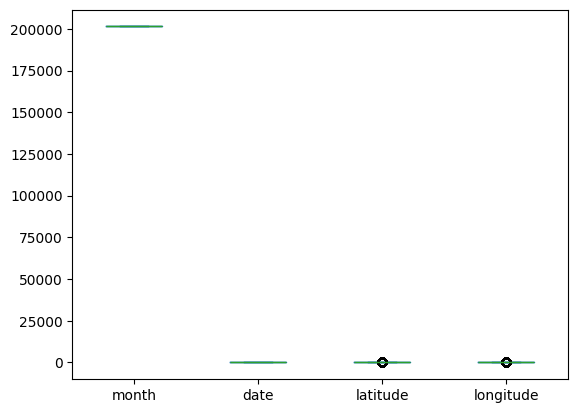

In [9]:
full_data.plot(kind='box')

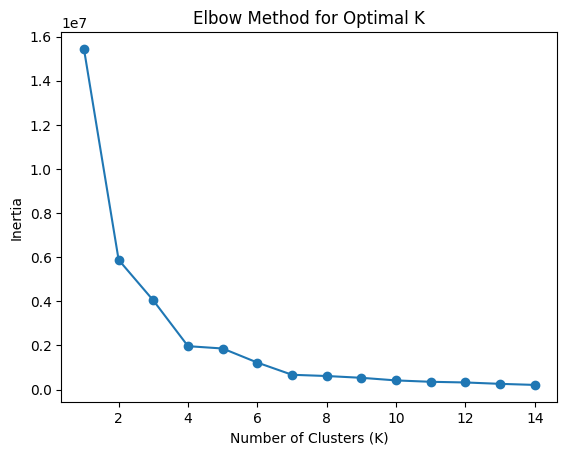

In [10]:
features = full_data[['latitude', 'longitude']]
features = pd.get_dummies(features, drop_first= True)

inertia = []
possible_k_values = range(1, 15)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.plot(possible_k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [11]:
kn = KneeLocator(range(1,15), inertia, curve='convex', direction='decreasing', S=0.001, online = True)
print('Optimal number of clusters:', kn.elbow)

Optimal number of clusters: 4


In [12]:
optimal_k = kn.elbow
kmeans = KMeans(n_clusters=optimal_k,init='k-means++', random_state=42)
clusters = kmeans.fit_predict(features)

full_data_copy = full_data.copy()
full_data_copy['Cluster'] = clusters
full_data_copy

,month,date,start time,end time,latitude,longitude,user id,Cluster
0,201406,1,2014-06-01 10:22:36,2014-06-01 11:09:52,31.237872,121.470259,edbc54bddf16494a49f39ac057b4185d,0
1,201406,1,2014-06-01 07:00:37,2014-06-01 08:49:20,31.237872,121.470259,f8206ab58b9bdb070673f7050242e9ee,0
2,201406,1,2014-06-01 02:49:16,2014-06-01 05:49:12,31.237872,121.470259,f8206ab58b9bdb070673f7050242e9ee,0
3,201406,1,2014-06-01 08:51:58,2014-06-01 09:20:50,31.237872,121.470259,f8206ab58b9bdb070673f7050242e9ee,0
4,201406,1,2014-05-31 23:49:10,2014-06-01 02:49:07,31.237872,121.470259,f8206ab58b9bdb070673f7050242e9ee,0
...,...,...,...,...,...,...,...,...
6236615,201411,30,2014-11-30 07:57:06,2014-11-30 08:09:57,31.125764,121.562057,67f65f153e3641e7fafcc1127b7d5408,0
6236616,201411,30,2014-11-30 20:11:35,2014-11-30 20:11:46,31.125764,121.562057,8cb12c76673fe530373a5b98b9ba14e5,0
6236617,201411,30,2014-11-30 06:47:36,2014-11-30 06:53:18,31.125764,121.562057,b2cc86ceef05de4ccde0d9b1fbda1723,0
6236618,201411,30,2014-11-30 06:47:36,2014-11-30 06:52:43,31.125764,121.562057,b2cc86ceef05de4ccde0d9b1fbda1723,0


# Map of location for each cluster

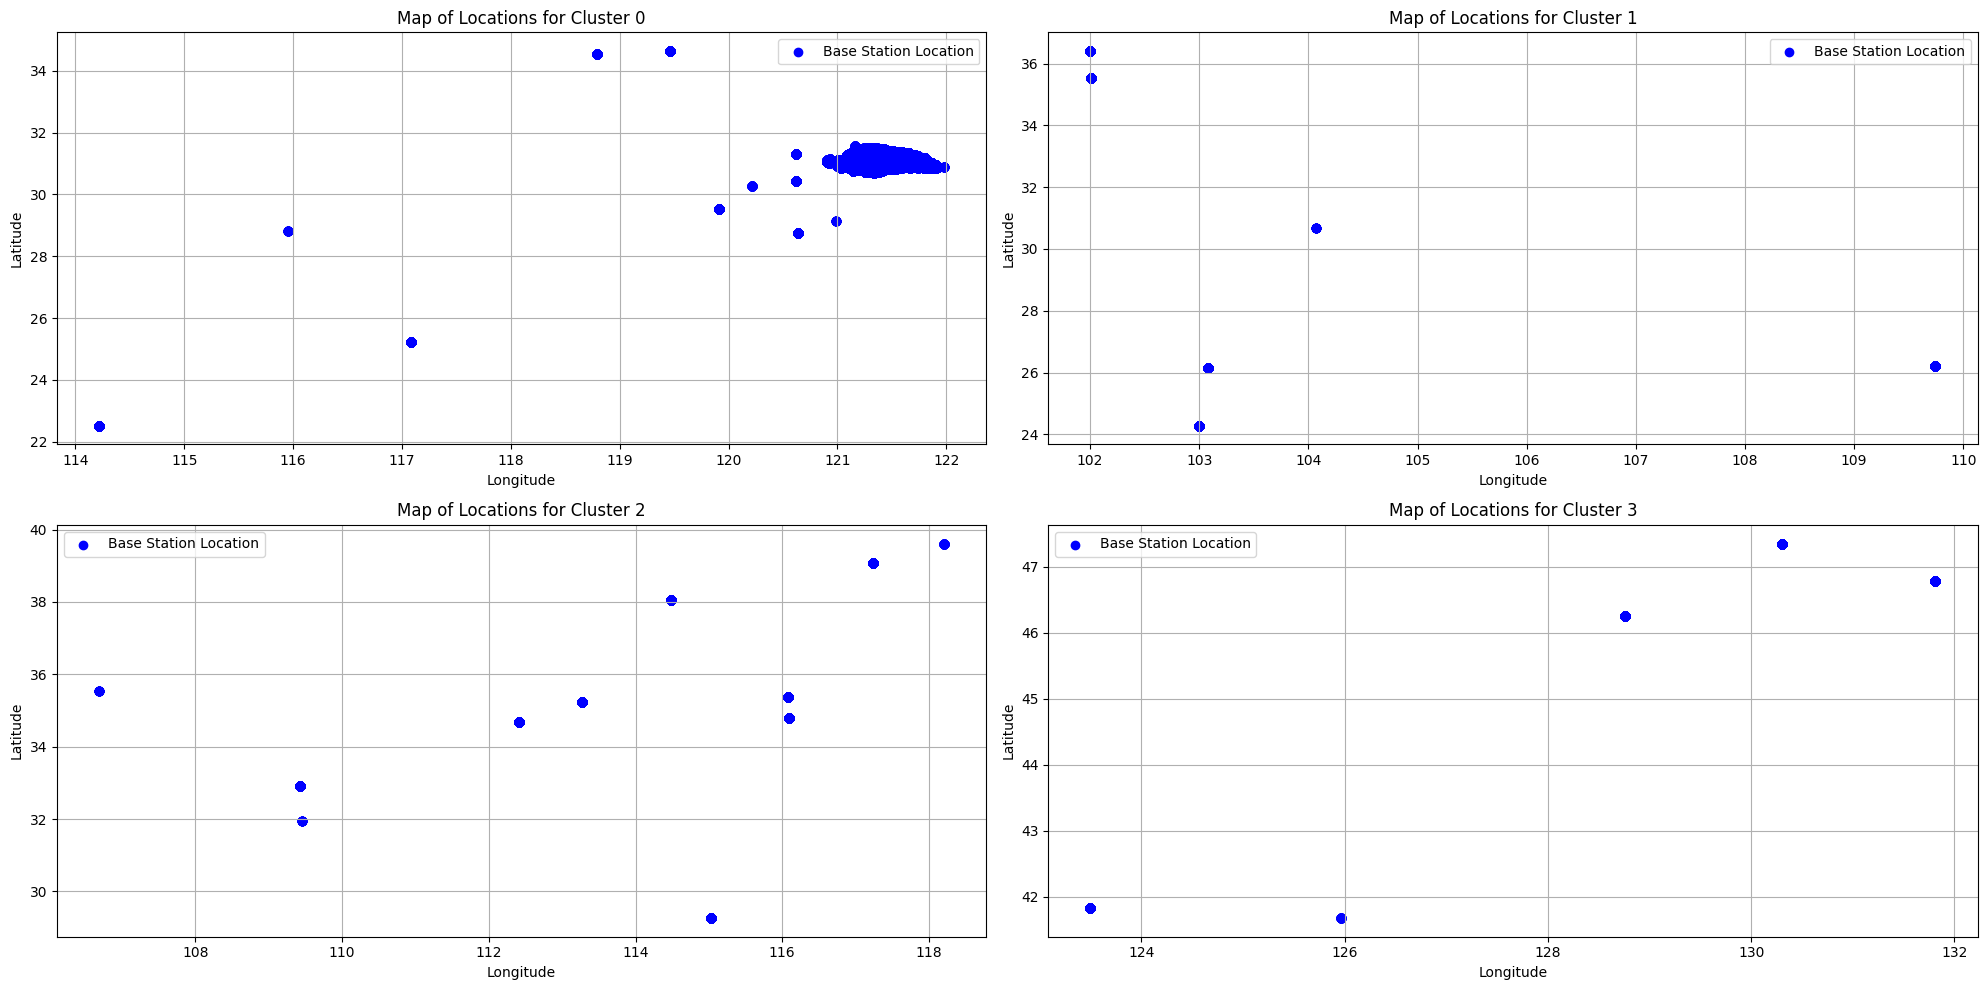

In [13]:
# Tạo một lưới 2x2 và vẽ từng biểu đồ vào từng ô
plt.figure(figsize=(20, 10))  # Kích thước của hình toàn cảnh

for i in range(4):
    lons = full_data_copy[full_data_copy['Cluster']==i]['longitude']
    lats = full_data_copy[full_data_copy['Cluster']==i]['latitude']
    
    plt.subplot(2, 2, i+1)  # Tạo ô tại vị trí i+1 trong lưới 2x2
    plt.scatter(lons, lats, color='blue', marker='o',label='Base Station Location')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Map of Locations for Cluster {i}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()  # Tự động điều chỉnh layout để tránh chồng chéo
plt.show()


# This one is for big size plot

In [14]:
# for i in range(4):
#     lons = full_data_copy[full_data_copy['Cluster']==i]['longitude']
#     lats = full_data_copy[full_data_copy['Cluster']==i]['latitude']

# # Vẽ biểu đồ
#     plt.figure(figsize=(10, 6))
#     plt.scatter(lons, lats, color='blue', marker='o',label='Base Station Location')
#     plt.xlabel('Longitude')
#     plt.ylabel('Latitude')
#     plt.title(f'Map of Locations Cluster {i}')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# Find best place to build the Station

In [15]:
full_data_copy['center_lon'] = 0
full_data_copy['center_lat'] = 0

In [16]:
for i in range(12):
    full_data_copy.loc[full_data_copy['Cluster'] == i, 'center_lat'] = full_data_copy[full_data_copy['Cluster']==i]['latitude'].mean()
    full_data_copy.loc[full_data_copy['Cluster'] == i, 'center_lon'] = full_data_copy[full_data_copy['Cluster']==i]['longitude'].mean()

C:\Users\TRIEU\AppData\Local\Temp\ipykernel_11032\1465149733.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '31.175035344880364' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  full_data_copy.loc[full_data_copy['Cluster'] == i, 'center_lat'] = full_data_copy[full_data_copy['Cluster']==i]['latitude'].mean()
C:\Users\TRIEU\AppData\Local\Temp\ipykernel_11032\1465149733.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '121.42948716693284' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  full_data_copy.loc[full_data_copy['Cluster'] == i, 'center_lon'] = full_data_copy[full_data_copy['Cluster']==i]['longitude'].mean()


In [17]:
full_data_copy

,month,date,start time,end time,latitude,longitude,user id,Cluster,center_lon,center_lat
0,201406,1,2014-06-01 10:22:36,2014-06-01 11:09:52,31.237872,121.470259,edbc54bddf16494a49f39ac057b4185d,0,121.429487,31.175035
1,201406,1,2014-06-01 07:00:37,2014-06-01 08:49:20,31.237872,121.470259,f8206ab58b9bdb070673f7050242e9ee,0,121.429487,31.175035
2,201406,1,2014-06-01 02:49:16,2014-06-01 05:49:12,31.237872,121.470259,f8206ab58b9bdb070673f7050242e9ee,0,121.429487,31.175035
3,201406,1,2014-06-01 08:51:58,2014-06-01 09:20:50,31.237872,121.470259,f8206ab58b9bdb070673f7050242e9ee,0,121.429487,31.175035
4,201406,1,2014-05-31 23:49:10,2014-06-01 02:49:07,31.237872,121.470259,f8206ab58b9bdb070673f7050242e9ee,0,121.429487,31.175035
...,...,...,...,...,...,...,...,...,...,...
6236615,201411,30,2014-11-30 07:57:06,2014-11-30 08:09:57,31.125764,121.562057,67f65f153e3641e7fafcc1127b7d5408,0,121.429487,31.175035
6236616,201411,30,2014-11-30 20:11:35,2014-11-30 20:11:46,31.125764,121.562057,8cb12c76673fe530373a5b98b9ba14e5,0,121.429487,31.175035
6236617,201411,30,2014-11-30 06:47:36,2014-11-30 06:53:18,31.125764,121.562057,b2cc86ceef05de4ccde0d9b1fbda1723,0,121.429487,31.175035
6236618,201411,30,2014-11-30 06:47:36,2014-11-30 06:52:43,31.125764,121.562057,b2cc86ceef05de4ccde0d9b1fbda1723,0,121.429487,31.175035


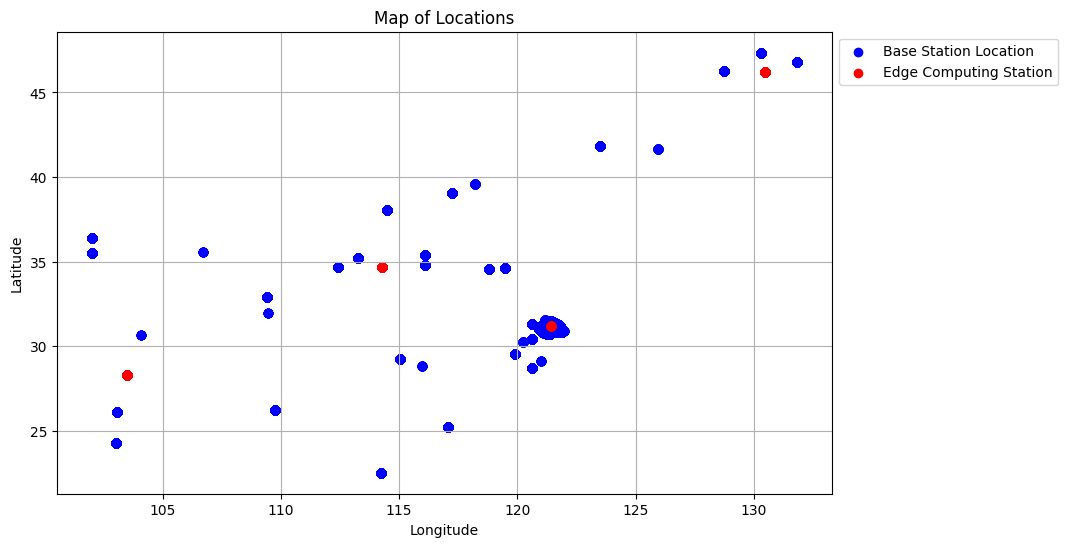

In [18]:
lons = full_data_copy['longitude']
lats = full_data_copy['latitude']

center_lon = full_data_copy['center_lon']
center_lat = full_data_copy['center_lat']

plt.figure(figsize=(10, 6))
plt.scatter(lons, lats, color='blue', marker='o',label='Base Station Location')
plt.scatter(center_lon, center_lat, color='red', marker='o',label='Edge Computing Station')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map of Locations')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

# Second K-Means

In [19]:
cluster0 = full_data_copy[full_data_copy['Cluster']==0]
cluster1 = full_data_copy[full_data_copy['Cluster']==1]
cluster2 = full_data_copy[full_data_copy['Cluster']==2]
cluster3 = full_data_copy[full_data_copy['Cluster']==3]

## Cluster 0

In [20]:
# df = data[(pd.notna(data['longitude'])) & (pd.notna(data['latitude']))]
features0 = cluster0[['latitude', 'longitude']]
features0 = pd.get_dummies(features0, drop_first= True)

inertia0 = []
possible_k_values = range(1, 15)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(features0)
    inertia0.append(kmeans.inertia_)
    
kn = KneeLocator(range(1,15), inertia, curve='convex', direction='decreasing', S=0.001, online = True)
print('Optimal number of clusters:', kn.elbow)

optimal_k = kn.elbow
kmeans = KMeans(n_clusters=optimal_k,init='k-means++', random_state=42)
clusters = kmeans.fit_predict(features0)

cluster0_copy = cluster0.drop(columns=['Cluster','center_lon','center_lat']).copy()
cluster0_copy['Cluster'] = clusters
cluster0_copy

cluster0_copy['center_lon'] = 0
cluster0_copy['center_lat'] = 0
for i in range(4):
    cluster0_copy.loc[cluster0_copy['Cluster'] == i, 'center_lat'] = cluster0_copy[cluster0_copy['Cluster']==i]['latitude'].mean()
    cluster0_copy.loc[cluster0_copy['Cluster'] == i, 'center_lon'] = cluster0_copy[cluster0_copy['Cluster']==i]['longitude'].mean()

Optimal number of clusters: 4


C:\Users\TRIEU\AppData\Local\Temp\ipykernel_11032\3549518165.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '31.234746714614666' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cluster0_copy.loc[cluster0_copy['Cluster'] == i, 'center_lat'] = cluster0_copy[cluster0_copy['Cluster']==i]['latitude'].mean()
C:\Users\TRIEU\AppData\Local\Temp\ipykernel_11032\3549518165.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '121.49195661529365' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cluster0_copy.loc[cluster0_copy['Cluster'] == i, 'center_lon'] = cluster0_copy[cluster0_copy['Cluster']==i]['longitude'].mean()


## Cluster 1

In [21]:
# df = data[(pd.notna(data['longitude'])) & (pd.notna(data['latitude']))]
features1 = cluster1[['latitude', 'longitude']]
features1 = pd.get_dummies(features1, drop_first= True)

inertia1 = []
possible_k_values = range(1, 15)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(features1)
    inertia1.append(kmeans.inertia_)

kn = KneeLocator(range(1,15), inertia, curve='convex', direction='decreasing', S=0.001, online = True)
print('Optimal number of clusters:', kn.elbow)

optimal_k = kn.elbow
kmeans = KMeans(n_clusters=optimal_k,init='k-means++', random_state=42)
clusters = kmeans.fit_predict(features1)


cluster1_copy = cluster1.drop(columns=['Cluster','center_lon','center_lat']).copy()
cluster1_copy['Cluster'] = clusters
cluster1_copy

cluster1_copy['center_lon'] = 0
cluster1_copy['center_lat'] = 0
for i in range(4):
    cluster1_copy.loc[cluster1_copy['Cluster'] == i, 'center_lat'] = cluster1_copy[cluster1_copy['Cluster']==i]['latitude'].mean()
    cluster1_copy.loc[cluster1_copy['Cluster'] == i, 'center_lon'] = cluster1_copy[cluster1_copy['Cluster']==i]['longitude'].mean()

Optimal number of clusters: 4


c:\Users\TRIEU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\TRIEU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\TRIEU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\TRIEU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly d

## Cluster 2

In [22]:
# df = data[(pd.notna(data['longitude'])) & (pd.notna(data['latitude']))]
features2 = cluster2[['latitude', 'longitude']]
features2 = pd.get_dummies(features2, drop_first= True)

inertia2 = []
possible_k_values = range(1, 15)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(features2)
    inertia2.append(kmeans.inertia_)

kn = KneeLocator(range(1,15), inertia, curve='convex', direction='decreasing', S=0.001, online = True)
print('Optimal number of clusters:', kn.elbow)

optimal_k = kn.elbow
kmeans = KMeans(n_clusters=optimal_k,init='k-means++', random_state=42)
clusters = kmeans.fit_predict(features2)

cluster2_copy = cluster2.drop(columns=['Cluster','center_lon','center_lat']).copy()
cluster2_copy['Cluster'] = clusters
cluster2_copy

cluster2_copy['center_lon'] = 0
cluster2_copy['center_lat'] = 0
for i in range(4):
    cluster2_copy.loc[cluster2_copy['Cluster'] == i, 'center_lat'] = cluster2_copy[cluster2_copy['Cluster']==i]['latitude'].mean()
    cluster2_copy.loc[cluster2_copy['Cluster'] == i, 'center_lon'] = cluster2_copy[cluster2_copy['Cluster']==i]['longitude'].mean()

Optimal number of clusters: 4


c:\Users\TRIEU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\TRIEU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\TRIEU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (11) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\TRIEU\AppData\Local\Temp\ipykernel_11032\2545425799.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of panda

## Cluster 3

In [23]:
# df = data[(pd.notna(data['longitude'])) & (pd.notna(data['latitude']))]
features3 = cluster3[['latitude', 'longitude']]
features3 = pd.get_dummies(features3, drop_first= True)

inertia3 = []
possible_k_values = range(1, 15)

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(features3)
    inertia3.append(kmeans.inertia_)

kn = KneeLocator(range(1,15), inertia, curve='convex', direction='decreasing', S=0.001, online = True)
print('Optimal number of clusters:', kn.elbow)

optimal_k = kn.elbow
kmeans = KMeans(n_clusters=optimal_k,init='k-means++', random_state=42)
clusters = kmeans.fit_predict(features3)

cluster3_copy = cluster3.drop(columns=['Cluster','center_lon','center_lat']).copy()
cluster3_copy['Cluster'] = clusters
cluster3_copy

cluster3_copy['center_lon'] = 0
cluster3_copy['center_lat'] = 0
for i in range(4):
    cluster3_copy.loc[cluster3_copy['Cluster'] == i, 'center_lat'] = cluster3_copy[cluster3_copy['Cluster']==i]['latitude'].mean()
    cluster3_copy.loc[cluster3_copy['Cluster'] == i, 'center_lon'] = cluster3_copy[cluster3_copy['Cluster']==i]['longitude'].mean()

Optimal number of clusters: 4


c:\Users\TRIEU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\TRIEU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\TRIEU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\TRIEU\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly du

# Compare

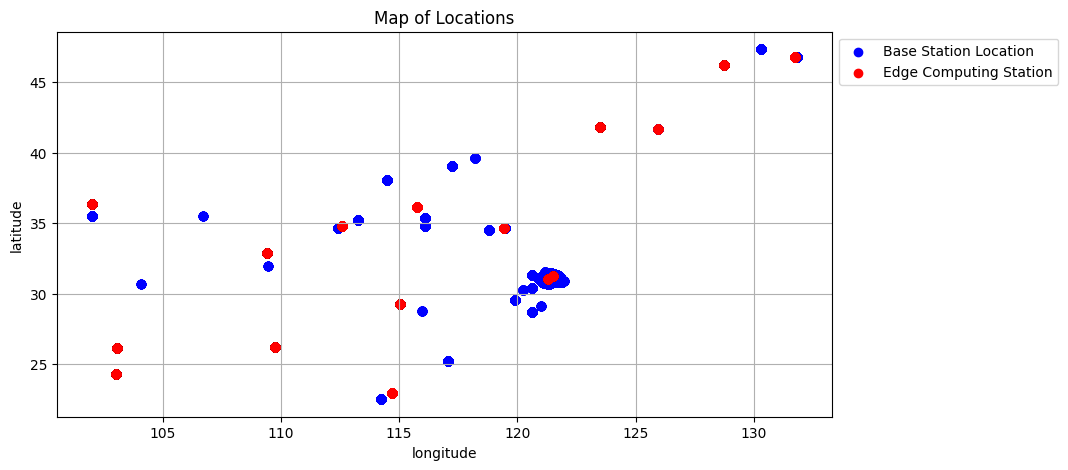

In [24]:
lons0 = cluster0_copy['longitude']
lats0 = cluster0_copy['latitude']
center_lon0 = cluster0_copy['center_lon']
center_lat0 = cluster0_copy['center_lat']

lons1 = cluster1_copy['longitude']
lats1 = cluster1_copy['latitude']
center_lon1 = cluster1_copy['center_lon']
center_lat1 = cluster1_copy['center_lat']

lons2 = cluster2_copy['longitude']
lats2 = cluster2_copy['latitude']
center_lon2 = cluster2_copy['center_lon']
center_lat2 = cluster2_copy['center_lat']

lons3 = cluster3_copy['longitude']
lats3 = cluster3_copy['latitude']
center_lon3 = cluster3_copy['center_lon']
center_lat3 = cluster3_copy['center_lat']

plt.figure(figsize=(10,5))
plt.scatter(lons0, lats0, color='blue', marker='o',label='Base Station Location')
plt.scatter(center_lon0, center_lat0, color='red', marker='o',label='Edge Computing Station')
plt.scatter(lons1, lats1, color='blue', marker='o')
plt.scatter(center_lon1, center_lat1, color='red', marker='o')
plt.scatter(lons2, lats2, color='blue', marker='o')
plt.scatter(center_lon2, center_lat2, color='red', marker='o')
plt.scatter(lons3, lats3, color='blue', marker='o')
plt.scatter(center_lon3, center_lat3, color='red', marker='o')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Map of Locations')
plt.grid(True)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.show()

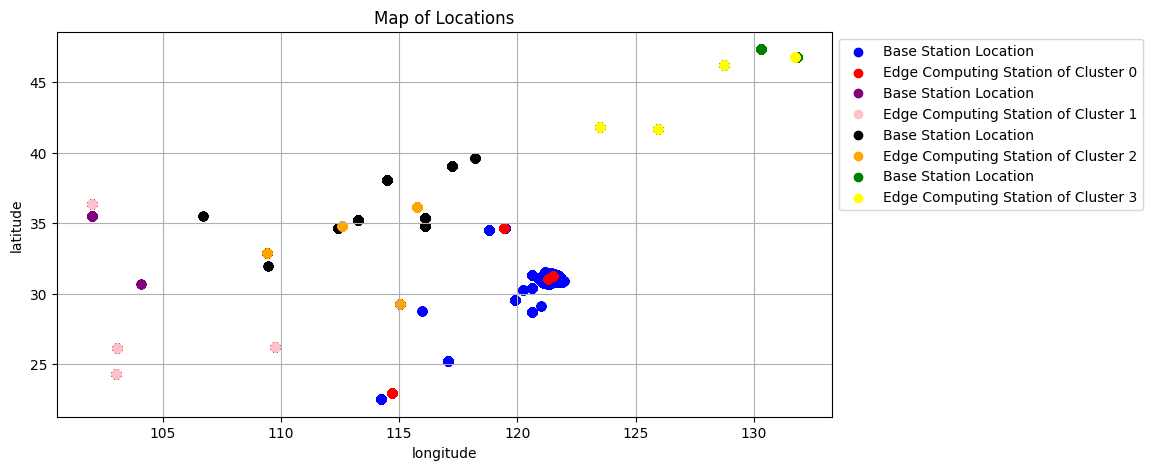

In [25]:
lons0 = cluster0_copy['longitude']
lats0 = cluster0_copy['latitude']
center_lon0 = cluster0_copy['center_lon']
center_lat0 = cluster0_copy['center_lat']

lons1 = cluster1_copy['longitude']
lats1 = cluster1_copy['latitude']
center_lon1 = cluster1_copy['center_lon']
center_lat1 = cluster1_copy['center_lat']

lons2 = cluster2_copy['longitude']
lats2 = cluster2_copy['latitude']
center_lon2 = cluster2_copy['center_lon']
center_lat2 = cluster2_copy['center_lat']

lons3 = cluster3_copy['longitude']
lats3 = cluster3_copy['latitude']
center_lon3 = cluster3_copy['center_lon']
center_lat3 = cluster3_copy['center_lat']

plt.figure(figsize=(10,5))
plt.scatter(lons0, lats0, color='blue', marker='o',label='Base Station Location')
plt.scatter(center_lon0, center_lat0, color='red', marker='o',label='Edge Computing Station of Cluster 0')
plt.scatter(lons1, lats1, color='purple', marker='o',label='Base Station Location')
plt.scatter(center_lon1, center_lat1, color='pink', marker='o',label='Edge Computing Station of Cluster 1')
plt.scatter(lons2, lats2, color='black', marker='o',label='Base Station Location')
plt.scatter(center_lon2, center_lat2, color='orange', marker='o',label='Edge Computing Station of Cluster 2')
plt.scatter(lons3, lats3, color='green', marker='o',label='Base Station Location')
plt.scatter(center_lon3, center_lat3, color='yellow', marker='o',label='Edge Computing Station of Cluster 3')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Map of Locations')
plt.grid(True)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.show()

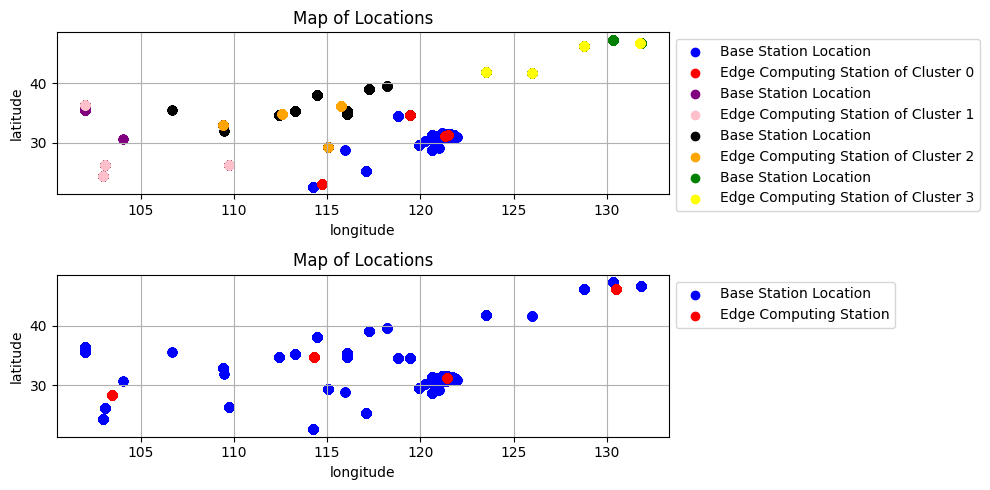

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.scatter(lons0, lats0, color='blue', marker='o',label='Base Station Location')
plt.scatter(center_lon0, center_lat0, color='red', marker='o',label='Edge Computing Station of Cluster 0')
plt.scatter(lons1, lats1, color='purple', marker='o',label='Base Station Location')
plt.scatter(center_lon1, center_lat1, color='pink', marker='o',label='Edge Computing Station of Cluster 1')
plt.scatter(lons2, lats2, color='black', marker='o',label='Base Station Location')
plt.scatter(center_lon2, center_lat2, color='orange', marker='o',label='Edge Computing Station of Cluster 2')
plt.scatter(lons3, lats3, color='green', marker='o',label='Base Station Location')
plt.scatter(center_lon3, center_lat3, color='yellow', marker='o',label='Edge Computing Station of Cluster 3')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Map of Locations')
plt.grid(True)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))

plt.subplot(2,1,2)
plt.scatter(lons, lats, color='blue', marker='o',label='Base Station Location')
plt.scatter(center_lon, center_lat, color='red', marker='o',label='Edge Computing Station')

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Map of Locations')
plt.grid(True)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

# WorkLoad 

In [27]:
new_column_values = np.random.randint(10, 10000, size=len(full_data))
full_data['Size'] = new_column_values

In [28]:
full_data['start time'] = pd.to_datetime(full_data['start time'])

# Tạo một cột mới để lưu giờ từ 'start time'
full_data['hour'] = full_data['start time'].dt.hour

# Lọc các bản ghi trong khoảng thời gian quan tâm (từ 11 giờ đến 12 giờ)
filtered_data_0_1 = full_data[(full_data['hour'] >= 0) & (full_data['hour'] < 1)]
filtered_data_1_2 = full_data[(full_data['hour'] >= 1) & (full_data['hour'] < 2)]
filtered_data_2_3 = full_data[(full_data['hour'] >= 2) & (full_data['hour'] < 3)]
filtered_data_3_4 = full_data[(full_data['hour'] >= 3) & (full_data['hour'] < 4)]
filtered_data_4_5 = full_data[(full_data['hour'] >= 4) & (full_data['hour'] < 5)]
filtered_data_5_6 = full_data[(full_data['hour'] >= 5) & (full_data['hour'] < 6)]
filtered_data_6_7 = full_data[(full_data['hour'] >= 6) & (full_data['hour'] < 7)]
filtered_data_7_8 = full_data[(full_data['hour'] >= 7) & (full_data['hour'] < 8)]
filtered_data_8_9 = full_data[(full_data['hour'] >= 8) & (full_data['hour'] < 9)]
filtered_data_9_10 = full_data[(full_data['hour'] >= 9) & (full_data['hour'] < 10)]
filtered_data_10_11 = full_data[(full_data['hour'] >= 10) & (full_data['hour'] < 11)]
filtered_data_11_12 = full_data[(full_data['hour'] >= 11) & (full_data['hour'] < 12)]
filtered_data_12_13 = full_data[(full_data['hour'] >= 12) & (full_data['hour'] < 13)]
filtered_data_13_14 = full_data[(full_data['hour'] >= 13) & (full_data['hour'] < 14)]
filtered_data_14_15 = full_data[(full_data['hour'] >= 14) & (full_data['hour'] < 15)]
filtered_data_15_16 = full_data[(full_data['hour'] >= 15) & (full_data['hour'] < 16)]
filtered_data_16_17 = full_data[(full_data['hour'] >= 16) & (full_data['hour'] < 17)]
filtered_data_17_18 = full_data[(full_data['hour'] >= 17) & (full_data['hour'] < 18)]
filtered_data_18_19 = full_data[(full_data['hour'] >= 18) & (full_data['hour'] < 19)]
filtered_data_19_20 = full_data[(full_data['hour'] >= 19) & (full_data['hour'] < 20)]
filtered_data_20_21 = full_data[(full_data['hour'] >= 20) & (full_data['hour'] < 21)]
filtered_data_21_22 = full_data[(full_data['hour'] >= 21) & (full_data['hour'] < 22)]
filtered_data_22_23 = full_data[(full_data['hour'] >= 22) & (full_data['hour'] < 23)]
filtered_data_23_24 = full_data[(full_data['hour'] >= 23) & (full_data['hour'] < 24)]

In [29]:
# full_data_copy['start time'] = pd.to_datetime(full_data_copy['start time'])

# # Tạo một cột mới để lưu giờ từ 'start time'
# full_data_copy['hour'] = full_data_copy['start time'].dt.hour

# # Lọc các bản ghi trong khoảng thời gian quan tâm (từ 11 giờ đến 12 giờ)
# filtered_data_0_1 = full_data_copy[(full_data_copy['hour'] >= 0) & (full_data_copy['hour'] < 1)]
# filtered_data_1_2 = full_data_copy[(full_data_copy['hour'] >= 1) & (full_data_copy['hour'] < 2)]
# filtered_data_2_3 = full_data_copy[(full_data_copy['hour'] >= 2) & (full_data_copy['hour'] < 3)]
# filtered_data_3_4 = full_data_copy[(full_data_copy['hour'] >= 3) & (full_data_copy['hour'] < 4)]
# filtered_data_4_5 = full_data_copy[(full_data_copy['hour'] >= 4) & (full_data_copy['hour'] < 5)]
# filtered_data_5_6 = full_data_copy[(full_data_copy['hour'] >= 5) & (full_data_copy['hour'] < 6)]
# filtered_data_6_7 = full_data_copy[(full_data_copy['hour'] >= 6) & (full_data_copy['hour'] < 7)]
# filtered_data_7_8 = full_data_copy[(full_data_copy['hour'] >= 7) & (full_data_copy['hour'] < 8)]
# filtered_data_8_9 = full_data_copy[(full_data_copy['hour'] >= 8) & (full_data_copy['hour'] < 9)]
# filtered_data_9_10 = full_data_copy[(full_data_copy['hour'] >= 9) & (full_data_copy['hour'] < 10)]
# filtered_data_10_11 = full_data_copy[(full_data_copy['hour'] >= 10) & (full_data_copy['hour'] < 11)]
# filtered_data_11_12 = full_data_copy[(full_data_copy['hour'] >= 11) & (full_data_copy['hour'] < 12)]
# filtered_data_12_13 = full_data_copy[(full_data_copy['hour'] >= 12) & (full_data_copy['hour'] < 13)]
# filtered_data_13_14 = full_data_copy[(full_data_copy['hour'] >= 13) & (full_data_copy['hour'] < 14)]
# filtered_data_14_15 = full_data_copy[(full_data_copy['hour'] >= 14) & (full_data_copy['hour'] < 15)]
# filtered_data_15_16 = full_data_copy[(full_data_copy['hour'] >= 15) & (full_data_copy['hour'] < 16)]
# filtered_data_16_17 = full_data_copy[(full_data_copy['hour'] >= 16) & (full_data_copy['hour'] < 17)]
# filtered_data_17_18 = full_data_copy[(full_data_copy['hour'] >= 17) & (full_data_copy['hour'] < 18)]
# filtered_data_18_19 = full_data_copy[(full_data_copy['hour'] >= 18) & (full_data_copy['hour'] < 19)]
# filtered_data_19_20 = full_data_copy[(full_data_copy['hour'] >= 19) & (full_data_copy['hour'] < 20)]
# filtered_data_20_21 = full_data_copy[(full_data_copy['hour'] >= 20) & (full_data_copy['hour'] < 21)]
# filtered_data_21_22 = full_data_copy[(full_data_copy['hour'] >= 21) & (full_data_copy['hour'] < 22)]
# filtered_data_22_23 = full_data_copy[(full_data_copy['hour'] >= 22) & (full_data_copy['hour'] < 23)]
# filtered_data_23_24 = full_data_copy[(full_data_copy['hour'] >= 23) & (full_data_copy['hour'] < 24)]

In [30]:
full_data_size = full_data.copy()

In [31]:
new_frame_0_1 = filtered_data_0_1[['longitude','latitude','month']].groupby(by=['longitude','latitude','month']).value_counts().to_frame().reset_index()
new_frame_1_2 = filtered_data_1_2[['longitude','latitude','month']].groupby(by=['longitude','latitude','month']).value_counts().to_frame().reset_index()
new_frame_2_3 = filtered_data_2_3[['longitude','latitude','month']].groupby(by=['longitude','latitude','month']).value_counts().to_frame().reset_index()
new_frame_3_4 = filtered_data_3_4[['longitude','latitude','month']].groupby(by=['longitude','latitude','month']).value_counts().to_frame().reset_index()
new_frame_4_5 = filtered_data_4_5[['longitude','latitude','month']].groupby(by=['longitude','latitude','month']).value_counts().to_frame().reset_index()
new_frame_5_6 = filtered_data_5_6[['longitude','latitude','month']].groupby(by=['longitude','latitude','month']).value_counts().to_frame().reset_index()
new_frame_6_7 = filtered_data_6_7[['longitude','latitude','month']].groupby(by=['longitude','latitude','month']).value_counts().to_frame().reset_index()
new_frame_7_8 = filtered_data_7_8[['longitude','latitude','month']].groupby(by=['longitude','latitude','month']).value_counts().to_frame().reset_index()
new_frame_8_9 = filtered_data_8_9[['longitude','latitude','month']].groupby(by=['longitude','latitude','month']).value_counts().to_frame().reset_index()
new_frame_9_10 = filtered_data_9_10[['longitude','latitude','month']].groupby(by=['longitude','latitude','month']).value_counts().to_frame().reset_index()
new_frame_10_11 = filtered_data_10_11[['longitude','latitude','month']].groupby(by=['longitude','latitude','month']).value_counts().to_frame().reset_index()
new_frame_11_12 = filtered_data_11_12[['longitude','latitude','month']].groupby(by=['longitude','latitude','month']).value_counts().to_frame().reset_index()
new_frame_12_13 = filtered_data_12_13[['longitude','latitude','month']].groupby(by=['longitude','latitude','month']).value_counts().to_frame().reset_index()
new_frame_13_14 = filtered_data_13_14[['longitude','latitude','month']].groupby(by=['longitude','latitude','month']).value_counts().to_frame().reset_index()
new_frame_14_15 = filtered_data_14_15[['longitude','latitude','month']].groupby(by=['longitude','latitude','month']).value_counts().to_frame().reset_index()
new_frame_15_16 = filtered_data_15_16[['longitude','latitude','month']].groupby(by=['longitude','latitude','month']).value_counts().to_frame().reset_index()
new_frame_16_17 = filtered_data_16_17[['longitude','latitude','month']].groupby(by=['longitude','latitude','month']).value_counts().to_frame().reset_index()
new_frame_17_18 = filtered_data_17_18[['longitude','latitude','month']].groupby(by=['longitude','latitude','month']).value_counts().to_frame().reset_index()
new_frame_18_19 = filtered_data_18_19[['longitude','latitude','month']].groupby(by=['longitude','latitude','month']).value_counts().to_frame().reset_index()
new_frame_19_20 = filtered_data_19_20[['longitude','latitude','month']].groupby(by=['longitude','latitude','month']).value_counts().to_frame().reset_index()
new_frame_20_21 = filtered_data_20_21[['longitude','latitude','month']].groupby(by=['longitude','latitude','month']).value_counts().to_frame().reset_index()
new_frame_21_22 = filtered_data_21_22[['longitude','latitude','month']].groupby(by=['longitude','latitude','month']).value_counts().to_frame().reset_index()
new_frame_22_23 = filtered_data_22_23[['longitude','latitude','month']].groupby(by=['longitude','latitude','month']).value_counts().to_frame().reset_index()
new_frame_23_24 = filtered_data_23_24[['longitude','latitude','month']].groupby(by=['longitude','latitude','month']).value_counts().to_frame().reset_index()

# By hour

## 0-1

In [32]:
new_frame_0_1

,longitude,latitude,month,count
0,102.003965,36.406412,201406,13
1,102.003965,36.406412,201407,27
2,102.003965,36.406412,201408,31
3,102.003965,36.406412,201409,41
4,102.003965,36.406412,201410,28
...,...,...,...,...
9387,131.812182,46.777465,201407,28
9388,131.812182,46.777465,201408,19
9389,131.812182,46.777465,201409,12
9390,131.812182,46.777465,201410,21


## 1-2

In [33]:
new_frame_1_2

,longitude,latitude,month,count
0,102.003965,36.406412,201406,17
1,102.003965,36.406412,201407,23
2,102.003965,36.406412,201408,30
3,102.003965,36.406412,201409,27
4,102.003965,36.406412,201410,23
...,...,...,...,...
8910,131.812182,46.777465,201407,17
8911,131.812182,46.777465,201408,19
8912,131.812182,46.777465,201409,21
8913,131.812182,46.777465,201410,28


## 2-3

In [34]:
new_frame_2_3

,longitude,latitude,month,count
0,102.003965,36.406412,201406,15
1,102.003965,36.406412,201407,28
2,102.003965,36.406412,201408,24
3,102.003965,36.406412,201409,30
4,102.003965,36.406412,201410,20
...,...,...,...,...
8559,131.812182,46.777465,201407,17
8560,131.812182,46.777465,201408,46
8561,131.812182,46.777465,201409,36
8562,131.812182,46.777465,201410,12


## 3-4

In [35]:
new_frame_3_4

,longitude,latitude,month,count
0,102.003965,36.406412,201406,11
1,102.003965,36.406412,201407,38
2,102.003965,36.406412,201408,20
3,102.003965,36.406412,201409,30
4,102.003965,36.406412,201410,18
...,...,...,...,...
8550,131.812182,46.777465,201407,19
8551,131.812182,46.777465,201408,21
8552,131.812182,46.777465,201409,19
8553,131.812182,46.777465,201410,24


## 4-5

In [36]:
new_frame_4_5

,longitude,latitude,month,count
0,102.003965,36.406412,201406,16
1,102.003965,36.406412,201407,32
2,102.003965,36.406412,201408,34
3,102.003965,36.406412,201409,27
4,102.003965,36.406412,201410,22
...,...,...,...,...
8729,131.812182,46.777465,201407,33
8730,131.812182,46.777465,201408,22
8731,131.812182,46.777465,201409,15
8732,131.812182,46.777465,201410,21


## 5-6

In [37]:
new_frame_5_6

,longitude,latitude,month,count
0,102.003965,36.406412,201406,16
1,102.003965,36.406412,201407,32
2,102.003965,36.406412,201408,32
3,102.003965,36.406412,201409,35
4,102.003965,36.406412,201410,16
...,...,...,...,...
9408,131.812182,46.777465,201407,19
9409,131.812182,46.777465,201408,49
9410,131.812182,46.777465,201409,34
9411,131.812182,46.777465,201410,15


## 6-7

In [38]:
new_frame_6_7

,longitude,latitude,month,count
0,102.003965,36.406412,201406,32
1,102.003965,36.406412,201407,43
2,102.003965,36.406412,201408,38
3,102.003965,36.406412,201409,52
4,102.003965,36.406412,201410,25
...,...,...,...,...
10572,131.812182,46.777465,201407,26
10573,131.812182,46.777465,201408,33
10574,131.812182,46.777465,201409,30
10575,131.812182,46.777465,201410,28


## 7-8

In [39]:
new_frame_7_8

,longitude,latitude,month,count
0,102.003965,36.406412,201406,66
1,102.003965,36.406412,201407,96
2,102.003965,36.406412,201408,69
3,102.003965,36.406412,201409,86
4,102.003965,36.406412,201410,56
...,...,...,...,...
13031,131.812182,46.777465,201407,75
13032,131.812182,46.777465,201408,80
13033,131.812182,46.777465,201409,74
13034,131.812182,46.777465,201410,57


## 8-9

In [40]:
new_frame_8_9

,longitude,latitude,month,count
0,102.003965,36.406412,201406,49
1,102.003965,36.406412,201407,62
2,102.003965,36.406412,201408,43
3,102.003965,36.406412,201409,47
4,102.003965,36.406412,201410,22
...,...,...,...,...
13497,131.812182,46.777465,201407,25
13498,131.812182,46.777465,201408,50
13499,131.812182,46.777465,201409,32
13500,131.812182,46.777465,201410,18


## 9-10

In [41]:
new_frame_9_10

,longitude,latitude,month,count
0,102.003965,36.406412,201406,23
1,102.003965,36.406412,201407,37
2,102.003965,36.406412,201408,41
3,102.003965,36.406412,201409,36
4,102.003965,36.406412,201410,12
...,...,...,...,...
13819,131.812182,46.777465,201407,42
13820,131.812182,46.777465,201408,36
13821,131.812182,46.777465,201409,43
13822,131.812182,46.777465,201410,35


## 10-11

In [42]:
new_frame_10_11

,longitude,latitude,month,count
0,102.003965,36.406412,201406,43
1,102.003965,36.406412,201407,67
2,102.003965,36.406412,201408,73
3,102.003965,36.406412,201409,56
4,102.003965,36.406412,201410,44
...,...,...,...,...
13992,131.812182,46.777465,201407,23
13993,131.812182,46.777465,201408,43
13994,131.812182,46.777465,201409,17
13995,131.812182,46.777465,201410,51


## 11-12

In [43]:
new_frame_11_12

,longitude,latitude,month,count
0,102.003965,36.406412,201406,59
1,102.003965,36.406412,201407,87
2,102.003965,36.406412,201408,69
3,102.003965,36.406412,201409,70
4,102.003965,36.406412,201410,54
...,...,...,...,...
14084,131.812182,46.777465,201407,16
14085,131.812182,46.777465,201408,46
14086,131.812182,46.777465,201409,35
14087,131.812182,46.777465,201410,14


## 12-13

In [44]:
new_frame_12_13

,longitude,latitude,month,count
0,102.003965,36.406412,201406,39
1,102.003965,36.406412,201407,28
2,102.003965,36.406412,201408,39
3,102.003965,36.406412,201409,31
4,102.003965,36.406412,201410,21
...,...,...,...,...
14171,131.812182,46.777465,201407,30
14172,131.812182,46.777465,201408,45
14173,131.812182,46.777465,201409,32
14174,131.812182,46.777465,201410,29


## 13-14

In [45]:
new_frame_13_14

,longitude,latitude,month,count
0,102.003965,36.406412,201406,56
1,102.003965,36.406412,201407,45
2,102.003965,36.406412,201408,53
3,102.003965,36.406412,201409,46
4,102.003965,36.406412,201410,68
...,...,...,...,...
14066,131.812182,46.777465,201407,34
14067,131.812182,46.777465,201408,53
14068,131.812182,46.777465,201409,23
14069,131.812182,46.777465,201410,31


## 14-15

In [46]:
new_frame_14_15

,longitude,latitude,month,count
0,102.003965,36.406412,201406,32
1,102.003965,36.406412,201407,29
2,102.003965,36.406412,201408,43
3,102.003965,36.406412,201409,51
4,102.003965,36.406412,201410,40
...,...,...,...,...
13964,131.812182,46.777465,201407,26
13965,131.812182,46.777465,201408,50
13966,131.812182,46.777465,201409,23
13967,131.812182,46.777465,201410,41


## 15-16

In [47]:
new_frame_15_16

,longitude,latitude,month,count
0,102.003965,36.406412,201406,20
1,102.003965,36.406412,201407,29
2,102.003965,36.406412,201408,34
3,102.003965,36.406412,201409,28
4,102.003965,36.406412,201410,18
...,...,...,...,...
13864,131.812182,46.777465,201407,29
13865,131.812182,46.777465,201408,43
13866,131.812182,46.777465,201409,26
13867,131.812182,46.777465,201410,40


## 16-17

In [48]:
new_frame_16_17

,longitude,latitude,month,count
0,102.003965,36.406412,201406,41
1,102.003965,36.406412,201407,83
2,102.003965,36.406412,201408,52
3,102.003965,36.406412,201409,45
4,102.003965,36.406412,201410,70
...,...,...,...,...
13756,131.812182,46.777465,201407,31
13757,131.812182,46.777465,201408,32
13758,131.812182,46.777465,201409,35
13759,131.812182,46.777465,201410,31


## 17-18

In [49]:
new_frame_17_18

,longitude,latitude,month,count
0,102.003965,36.406412,201406,37
1,102.003965,36.406412,201407,62
2,102.003965,36.406412,201408,61
3,102.003965,36.406412,201409,53
4,102.003965,36.406412,201410,30
...,...,...,...,...
13646,131.812182,46.777465,201407,36
13647,131.812182,46.777465,201408,34
13648,131.812182,46.777465,201409,38
13649,131.812182,46.777465,201410,27


## 18-19

In [50]:
new_frame_18_19

,longitude,latitude,month,count
0,102.003965,36.406412,201406,29
1,102.003965,36.406412,201407,59
2,102.003965,36.406412,201408,85
3,102.003965,36.406412,201409,76
4,102.003965,36.406412,201410,36
...,...,...,...,...
13273,131.812182,46.777465,201407,34
13274,131.812182,46.777465,201408,21
13275,131.812182,46.777465,201409,27
13276,131.812182,46.777465,201410,36


## 19-20

In [51]:
new_frame_19_20

,longitude,latitude,month,count
0,102.003965,36.406412,201406,37
1,102.003965,36.406412,201407,59
2,102.003965,36.406412,201408,82
3,102.003965,36.406412,201409,68
4,102.003965,36.406412,201410,74
...,...,...,...,...
12850,131.812182,46.777465,201407,46
12851,131.812182,46.777465,201408,43
12852,131.812182,46.777465,201409,27
12853,131.812182,46.777465,201410,58


## 20-21

In [52]:
new_frame_20_21

,longitude,latitude,month,count
0,102.003965,36.406412,201406,34
1,102.003965,36.406412,201407,41
2,102.003965,36.406412,201408,73
3,102.003965,36.406412,201409,93
4,102.003965,36.406412,201410,43
...,...,...,...,...
12229,131.812182,46.777465,201407,43
12230,131.812182,46.777465,201408,48
12231,131.812182,46.777465,201409,31
12232,131.812182,46.777465,201410,46


## 21-22

In [53]:
new_frame_21_22

,longitude,latitude,month,count
0,102.003965,36.406412,201406,27
1,102.003965,36.406412,201407,34
2,102.003965,36.406412,201408,60
3,102.003965,36.406412,201409,40
4,102.003965,36.406412,201410,28
...,...,...,...,...
11576,131.812182,46.777465,201407,26
11577,131.812182,46.777465,201408,26
11578,131.812182,46.777465,201409,41
11579,131.812182,46.777465,201410,19


## 22-23

In [54]:
new_frame_22_23

,longitude,latitude,month,count
0,102.003965,36.406412,201406,25
1,102.003965,36.406412,201407,24
2,102.003965,36.406412,201408,59
3,102.003965,36.406412,201409,52
4,102.003965,36.406412,201410,33
...,...,...,...,...
10933,131.812182,46.777465,201407,18
10934,131.812182,46.777465,201408,22
10935,131.812182,46.777465,201409,18
10936,131.812182,46.777465,201410,29


## 23-24

In [55]:
new_frame_23_24

,longitude,latitude,month,count
0,102.003965,36.406412,201406,37
1,102.003965,36.406412,201407,57
2,102.003965,36.406412,201408,80
3,102.003965,36.406412,201409,80
4,102.003965,36.406412,201410,74
...,...,...,...,...
10781,131.812182,46.777465,201407,61
10782,131.812182,46.777465,201408,76
10783,131.812182,46.777465,201409,71
10784,131.812182,46.777465,201410,67


# Find by longitude and latitude

In [56]:
def find_place(data,long,lat):
    find = data[(data['longitude'] == long) & (data['latitude'] == lat)]
    return find

In [57]:
find_place(data=new_frame_11_12,long=102.003965,lat=36.406412)

,longitude,latitude,month,count
0,102.003965,36.406412,201406,59
1,102.003965,36.406412,201407,87
2,102.003965,36.406412,201408,69
3,102.003965,36.406412,201409,70
4,102.003965,36.406412,201410,54
5,102.003965,36.406412,201411,66


# Group by Date

In [58]:
def by_date(data):
    by_day = data[['longitude','latitude','date']].groupby(by=['longitude','latitude','date']).value_counts().to_frame().reset_index()
    return by_day

In [59]:
by_date(filtered_data_1_2)

,longitude,latitude,date,count
0,102.003965,36.406412,1,1
1,102.003965,36.406412,2,5
2,102.003965,36.406412,3,3
3,102.003965,36.406412,4,1
4,102.003965,36.406412,5,9
...,...,...,...,...
32265,131.812182,46.777465,26,6
32266,131.812182,46.777465,27,3
32267,131.812182,46.777465,28,4
32268,131.812182,46.777465,29,4


# Group by Month and Date

In [60]:
def by_month_date(data,month=None,day=None):
    by_month = data[['longitude','latitude','month','date']].groupby(by=['longitude','latitude','month','date']).value_counts().to_frame().reset_index()
    if day is None:
        by_month = by_month[(by_month['month']==201400 + month)]
    elif month is None:
        by_month = by_month[(by_month['date']== day)]
    else:
        by_month = by_month[(by_month['month'] == 201400 + month) & (by_month['date'] == day)]
    return by_month

In [61]:
by_month_date(filtered_data_0_1,month=7,day=6)

,longitude,latitude,month,date,count
100,102.999068,24.284812,201407,6,3
176,103.078562,26.139329,201407,6,6
649,116.072359,35.379598,201407,6,3
1107,121.030128,30.898595,201407,6,1
1167,121.036331,31.119557,201407,6,2
...,...,...,...,...,...
79227,121.810034,31.103853,201407,6,3
79332,121.833020,30.866830,201407,6,1
79430,121.844791,31.045313,201407,6,1
79527,121.856429,30.877060,201407,6,1


# Merge Data To Show All

## By User Acces

In [62]:
import pandas as pd

dataframes = [filtered_data_0_1, filtered_data_1_2, filtered_data_2_3, filtered_data_3_4, 
              filtered_data_4_5, filtered_data_5_6, filtered_data_6_7, filtered_data_7_8, 
              filtered_data_8_9, filtered_data_9_10, filtered_data_10_11, filtered_data_11_12, 
              filtered_data_12_13, filtered_data_13_14, filtered_data_14_15, filtered_data_15_16, 
              filtered_data_16_17, filtered_data_17_18, filtered_data_18_19, filtered_data_19_20, 
              filtered_data_20_21, filtered_data_21_22, filtered_data_22_23, filtered_data_23_24]

suffixes = tuple(f'_{i}_{i+1}' for i in range(len(dataframes) - 1))

merged_df = dataframes[0].value_counts(['longitude', 'latitude']).rename('count').reset_index()

for i, df in enumerate(dataframes[1:], start=1):
    if i < len(suffixes):
        suffix = suffixes[i]
    else:
        suffix = ''
    count_col_name = f'count{suffix}'
    df_count = df.value_counts(['longitude', 'latitude']).rename(count_col_name).reset_index()
    merged_df = pd.merge(merged_df,
                         df_count,
                         how='outer', on=['longitude', 'latitude'])

In [63]:
def find_base_max_count(column_time):
    index_of_max_value = merged_df[column_time].idxmax()

    longitude = merged_df.loc[index_of_max_value, 'longitude']
    latitude = merged_df.loc[index_of_max_value, 'latitude']

    print(f'Longitude {column_time}: ', longitude)
    print(f'Latitude  {column_time}:', latitude)

In [64]:
list_columns = merged_df.drop(columns=['longitude','latitude']).columns.to_list()
for i in list_columns:
    find_base_max_count(i)
    print()

Longitude count_x:  121.358718
Latitude  count_x: 31.159304

Longitude count_1_2:  121.358718
Latitude  count_1_2: 31.159304

Longitude count_2_3:  121.358718
Latitude  count_2_3: 31.159304

Longitude count_3_4:  121.358718
Latitude  count_3_4: 31.159304

Longitude count_4_5:  121.358718
Latitude  count_4_5: 31.159304

Longitude count_5_6:  121.358718
Latitude  count_5_6: 31.159304

Longitude count_6_7:  121.769904
Latitude  count_6_7: 31.051898

Longitude count_7_8:  121.769904
Latitude  count_7_8: 31.051898

Longitude count_8_9:  121.769904
Latitude  count_8_9: 31.051898

Longitude count_9_10:  121.769904
Latitude  count_9_10: 31.051898

Longitude count_10_11:  121.769904
Latitude  count_10_11: 31.051898

Longitude count_11_12:  121.769904
Latitude  count_11_12: 31.051898

Longitude count_12_13:  121.769904
Latitude  count_12_13: 31.051898

Longitude count_13_14:  121.769904
Latitude  count_13_14: 31.051898

Longitude count_14_15:  121.769904
Latitude  count_14_15: 31.051898

Longitu

In [65]:
merged_df

,longitude,latitude,count_x,count_1_2,count_2_3,count_3_4,count_4_5,count_5_6,count_6_7,count_7_8,...,count_14_15,count_15_16,count_16_17,count_17_18,count_18_19,count_19_20,count_20_21,count_21_22,count_22_23,count_y
0,102.003965,36.406412,163.0,143.0,155.0,145.0,165.0,161.0,252.0,443.0,...,256.0,195.0,346.0,291.0,336.0,368.0,335.0,249.0,225.0,415.0
1,102.007600,35.522852,NaN,3.0,NaN,2.0,2.0,4.0,7.0,8.0,...,7.0,6.0,5.0,8.0,10.0,18.0,10.0,13.0,14.0,15.0
2,102.999068,24.284812,77.0,30.0,33.0,56.0,40.0,44.0,76.0,289.0,...,169.0,152.0,134.0,144.0,203.0,138.0,173.0,128.0,105.0,142.0
3,103.078562,26.139329,354.0,268.0,272.0,278.0,204.0,223.0,358.0,766.0,...,737.0,827.0,850.0,1076.0,964.0,899.0,803.0,661.0,501.0,747.0
4,104.067923,30.679943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,1.0,1.0,1.0,NaN,2.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3037,123.498927,41.835279,11.0,6.0,8.0,5.0,6.0,12.0,10.0,41.0,...,29.0,43.0,40.0,49.0,35.0,33.0,25.0,27.0,30.0,25.0
3038,125.960124,41.677262,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,...,3.0,4.0,7.0,3.0,2.0,4.0,1.0,NaN,2.0,1.0
3039,128.762232,46.247857,8.0,1.0,5.0,7.0,3.0,7.0,14.0,181.0,...,96.0,62.0,139.0,20.0,23.0,28.0,22.0,17.0,11.0,7.0
3040,130.301233,47.350920,NaN,NaN,NaN,NaN,5.0,2.0,9.0,14.0,...,19.0,11.0,13.0,6.0,12.0,7.0,10.0,4.0,1.0,NaN


## By Size with random size

### Prepare data

#### Full

In [66]:
size_data_0_1 = filtered_data_0_1[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_1_2 = filtered_data_1_2[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_2_3 = filtered_data_2_3[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_3_4 = filtered_data_3_4[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_4_5 = filtered_data_4_5[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_5_6 = filtered_data_5_6[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_6_7 = filtered_data_6_7[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_7_8 = filtered_data_7_8[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_8_9 = filtered_data_8_9[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_9_10 = filtered_data_9_10[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_10_11 = filtered_data_10_11[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_11_12 = filtered_data_11_12[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_12_13 = filtered_data_12_13[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_13_14 = filtered_data_13_14[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_14_15 = filtered_data_14_15[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_15_16 = filtered_data_15_16[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_16_17 = filtered_data_16_17[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_17_18 = filtered_data_17_18[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_18_19 = filtered_data_18_19[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_19_20 = filtered_data_19_20[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_20_21 = filtered_data_20_21[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_21_22 = filtered_data_21_22[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_22_23 = filtered_data_22_23[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_23_24 = filtered_data_23_24[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()

#### Cluster 0

In [67]:
new_column_values = np.random.randint(10, 10000, size=len(cluster0))
cluster0['Size'] = new_column_values

C:\Users\TRIEU\AppData\Local\Temp\ipykernel_11032\1326740833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster0['Size'] = new_column_values


In [68]:
cluster0['start time'] = pd.to_datetime(cluster0['start time'])

# Tạo một cột mới để lưu giờ từ 'start time'
cluster0['hour'] = cluster0['start time'].dt.hour

# Lọc các bản ghi trong khoảng thời gian quan tâm (từ 11 giờ đến 12 giờ)
filtered_data_0_1_cluster0 = cluster0[(cluster0['hour'] >= 0) & (cluster0['hour'] < 1)]
filtered_data_1_2_cluster0 = cluster0[(cluster0['hour'] >= 1) & (cluster0['hour'] < 2)]
filtered_data_2_3_cluster0 = cluster0[(cluster0['hour'] >= 2) & (cluster0['hour'] < 3)]
filtered_data_3_4_cluster0 = cluster0[(cluster0['hour'] >= 3) & (cluster0['hour'] < 4)]
filtered_data_4_5_cluster0 = cluster0[(cluster0['hour'] >= 4) & (cluster0['hour'] < 5)]
filtered_data_5_6_cluster0 = cluster0[(cluster0['hour'] >= 5) & (cluster0['hour'] < 6)]
filtered_data_6_7_cluster0 = cluster0[(cluster0['hour'] >= 6) & (cluster0['hour'] < 7)]
filtered_data_7_8_cluster0 = cluster0[(cluster0['hour'] >= 7) & (cluster0['hour'] < 8)]
filtered_data_8_9_cluster0 = cluster0[(cluster0['hour'] >= 8) & (cluster0['hour'] < 9)]
filtered_data_9_10_cluster0 = cluster0[(cluster0['hour'] >= 9) & (cluster0['hour'] < 10)]
filtered_data_10_11_cluster0 = cluster0[(cluster0['hour'] >= 10) & (cluster0['hour'] < 11)]
filtered_data_11_12_cluster0 = cluster0[(cluster0['hour'] >= 11) & (cluster0['hour'] < 12)]
filtered_data_12_13_cluster0 = cluster0[(cluster0['hour'] >= 12) & (cluster0['hour'] < 13)]
filtered_data_13_14_cluster0 = cluster0[(cluster0['hour'] >= 13) & (cluster0['hour'] < 14)]
filtered_data_14_15_cluster0 = cluster0[(cluster0['hour'] >= 14) & (cluster0['hour'] < 15)]
filtered_data_15_16_cluster0 = cluster0[(cluster0['hour'] >= 15) & (cluster0['hour'] < 16)]
filtered_data_16_17_cluster0 = cluster0[(cluster0['hour'] >= 16) & (cluster0['hour'] < 17)]
filtered_data_17_18_cluster0 = cluster0[(cluster0['hour'] >= 17) & (cluster0['hour'] < 18)]
filtered_data_18_19_cluster0 = cluster0[(cluster0['hour'] >= 18) & (cluster0['hour'] < 19)]
filtered_data_19_20_cluster0 = cluster0[(cluster0['hour'] >= 19) & (cluster0['hour'] < 20)]
filtered_data_20_21_cluster0 = cluster0[(cluster0['hour'] >= 20) & (cluster0['hour'] < 21)]
filtered_data_21_22_cluster0 = cluster0[(cluster0['hour'] >= 21) & (cluster0['hour'] < 22)]
filtered_data_22_23_cluster0 = cluster0[(cluster0['hour'] >= 22) & (cluster0['hour'] < 23)]
filtered_data_23_24_cluster0 = cluster0[(cluster0['hour'] >= 23) & (cluster0['hour'] < 24)]

C:\Users\TRIEU\AppData\Local\Temp\ipykernel_11032\4051668080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster0['start time'] = pd.to_datetime(cluster0['start time'])
C:\Users\TRIEU\AppData\Local\Temp\ipykernel_11032\4051668080.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster0['hour'] = cluster0['start time'].dt.hour


In [69]:
size_data_0_1_cluster0 = filtered_data_0_1_cluster0[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_1_2_cluster0 = filtered_data_1_2_cluster0[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_2_3_cluster0 = filtered_data_2_3_cluster0[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_3_4_cluster0 = filtered_data_3_4_cluster0[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_4_5_cluster0 = filtered_data_4_5_cluster0[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_5_6_cluster0 = filtered_data_5_6_cluster0[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_6_7_cluster0 = filtered_data_6_7_cluster0[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_7_8_cluster0 = filtered_data_7_8_cluster0[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_8_9_cluster0 = filtered_data_8_9_cluster0[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_9_10_cluster0 = filtered_data_9_10_cluster0[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_10_11_cluster0 = filtered_data_10_11_cluster0[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_11_12_cluster0 = filtered_data_11_12_cluster0[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_12_13_cluster0 = filtered_data_12_13_cluster0[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_13_14_cluster0 = filtered_data_13_14_cluster0[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_14_15_cluster0 = filtered_data_14_15_cluster0[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_15_16_cluster0 = filtered_data_15_16_cluster0[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_16_17_cluster0 = filtered_data_16_17_cluster0[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_17_18_cluster0 = filtered_data_17_18_cluster0[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_18_19_cluster0 = filtered_data_18_19_cluster0[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_19_20_cluster0 = filtered_data_19_20_cluster0[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_20_21_cluster0 = filtered_data_20_21_cluster0[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_21_22_cluster0 = filtered_data_21_22_cluster0[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_22_23_cluster0 = filtered_data_22_23_cluster0[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_23_24_cluster0 = filtered_data_23_24_cluster0[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()

#### Cluster 1

In [70]:
new_column_values = np.random.randint(10, 10000, size=len(cluster1))
cluster1['Size'] = new_column_values

C:\Users\TRIEU\AppData\Local\Temp\ipykernel_11032\1334238650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1['Size'] = new_column_values


In [71]:
cluster1['start time'] = pd.to_datetime(cluster1['start time'])

# Tạo một cột mới để lưu giờ từ 'start time'
cluster1['hour'] = cluster1['start time'].dt.hour

# Lọc các bản ghi trong khoảng thời gian quan tâm (từ 11 giờ đến 12 giờ)
filtered_data_0_1_cluster1 = cluster1[(cluster1['hour'] >= 0) & (cluster1['hour'] < 1)]
filtered_data_1_2_cluster1 = cluster1[(cluster1['hour'] >= 1) & (cluster1['hour'] < 2)]
filtered_data_2_3_cluster1 = cluster1[(cluster1['hour'] >= 2) & (cluster1['hour'] < 3)]
filtered_data_3_4_cluster1 = cluster1[(cluster1['hour'] >= 3) & (cluster1['hour'] < 4)]
filtered_data_4_5_cluster1 = cluster1[(cluster1['hour'] >= 4) & (cluster1['hour'] < 5)]
filtered_data_5_6_cluster1 = cluster1[(cluster1['hour'] >= 5) & (cluster1['hour'] < 6)]
filtered_data_6_7_cluster1 = cluster1[(cluster1['hour'] >= 6) & (cluster1['hour'] < 7)]
filtered_data_7_8_cluster1 = cluster1[(cluster1['hour'] >= 7) & (cluster1['hour'] < 8)]
filtered_data_8_9_cluster1 = cluster1[(cluster1['hour'] >= 8) & (cluster1['hour'] < 9)]
filtered_data_9_10_cluster1 = cluster1[(cluster1['hour'] >= 9) & (cluster1['hour'] < 10)]
filtered_data_10_11_cluster1 = cluster1[(cluster1['hour'] >= 10) & (cluster1['hour'] < 11)]
filtered_data_11_12_cluster1 = cluster1[(cluster1['hour'] >= 11) & (cluster1['hour'] < 12)]
filtered_data_12_13_cluster1 = cluster1[(cluster1['hour'] >= 12) & (cluster1['hour'] < 13)]
filtered_data_13_14_cluster1 = cluster1[(cluster1['hour'] >= 13) & (cluster1['hour'] < 14)]
filtered_data_14_15_cluster1 = cluster1[(cluster1['hour'] >= 14) & (cluster1['hour'] < 15)]
filtered_data_15_16_cluster1 = cluster1[(cluster1['hour'] >= 15) & (cluster1['hour'] < 16)]
filtered_data_16_17_cluster1 = cluster1[(cluster1['hour'] >= 16) & (cluster1['hour'] < 17)]
filtered_data_17_18_cluster1 = cluster1[(cluster1['hour'] >= 17) & (cluster1['hour'] < 18)]
filtered_data_18_19_cluster1 = cluster1[(cluster1['hour'] >= 18) & (cluster1['hour'] < 19)]
filtered_data_19_20_cluster1 = cluster1[(cluster1['hour'] >= 19) & (cluster1['hour'] < 20)]
filtered_data_20_21_cluster1 = cluster1[(cluster1['hour'] >= 20) & (cluster1['hour'] < 21)]
filtered_data_21_22_cluster1 = cluster1[(cluster1['hour'] >= 21) & (cluster1['hour'] < 22)]
filtered_data_22_23_cluster1 = cluster1[(cluster1['hour'] >= 22) & (cluster1['hour'] < 23)]
filtered_data_23_24_cluster1 = cluster1[(cluster1['hour'] >= 23) & (cluster1['hour'] < 24)]

C:\Users\TRIEU\AppData\Local\Temp\ipykernel_11032\2332712636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1['start time'] = pd.to_datetime(cluster1['start time'])
C:\Users\TRIEU\AppData\Local\Temp\ipykernel_11032\2332712636.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1['hour'] = cluster1['start time'].dt.hour


In [72]:
size_data_0_1_cluster1 = filtered_data_0_1_cluster1[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_1_2_cluster1 = filtered_data_1_2_cluster1[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_2_3_cluster1 = filtered_data_2_3_cluster1[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_3_4_cluster1 = filtered_data_3_4_cluster1[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_4_5_cluster1 = filtered_data_4_5_cluster1[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_5_6_cluster1 = filtered_data_5_6_cluster1[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_6_7_cluster1 = filtered_data_6_7_cluster1[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_7_8_cluster1 = filtered_data_7_8_cluster1[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_8_9_cluster1 = filtered_data_8_9_cluster1[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_9_10_cluster1 = filtered_data_9_10_cluster1[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_10_11_cluster1 = filtered_data_10_11_cluster1[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_11_12_cluster1 = filtered_data_11_12_cluster1[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_12_13_cluster1 = filtered_data_12_13_cluster1[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_13_14_cluster1 = filtered_data_13_14_cluster1[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_14_15_cluster1 = filtered_data_14_15_cluster1[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_15_16_cluster1 = filtered_data_15_16_cluster1[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_16_17_cluster1 = filtered_data_16_17_cluster1[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_17_18_cluster1 = filtered_data_17_18_cluster1[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_18_19_cluster1 = filtered_data_18_19_cluster1[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_19_20_cluster1 = filtered_data_19_20_cluster1[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_20_21_cluster1 = filtered_data_20_21_cluster1[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_21_22_cluster1 = filtered_data_21_22_cluster1[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_22_23_cluster1 = filtered_data_22_23_cluster1[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_23_24_cluster1 = filtered_data_23_24_cluster1[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()

#### Cluster 2

In [73]:
new_column_values = np.random.randint(10, 10000, size=len(cluster2))
cluster2['Size'] = new_column_values

C:\Users\TRIEU\AppData\Local\Temp\ipykernel_11032\376266767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster2['Size'] = new_column_values


In [74]:
cluster2['start time'] = pd.to_datetime(cluster2['start time'])

# Tạo một cột mới để lưu giờ từ 'start time'
cluster2['hour'] = cluster2['start time'].dt.hour

# Lọc các bản ghi trong khoảng thời gian quan tâm (từ 11 giờ đến 12 giờ)
filtered_data_0_1_cluster2 = cluster2[(cluster2['hour'] >= 0) & (cluster2['hour'] < 1)]
filtered_data_1_2_cluster2 = cluster2[(cluster2['hour'] >= 1) & (cluster2['hour'] < 2)]
filtered_data_2_3_cluster2 = cluster2[(cluster2['hour'] >= 2) & (cluster2['hour'] < 3)]
filtered_data_3_4_cluster2 = cluster2[(cluster2['hour'] >= 3) & (cluster2['hour'] < 4)]
filtered_data_4_5_cluster2 = cluster2[(cluster2['hour'] >= 4) & (cluster2['hour'] < 5)]
filtered_data_5_6_cluster2 = cluster2[(cluster2['hour'] >= 5) & (cluster2['hour'] < 6)]
filtered_data_6_7_cluster2 = cluster2[(cluster2['hour'] >= 6) & (cluster2['hour'] < 7)]
filtered_data_7_8_cluster2 = cluster2[(cluster2['hour'] >= 7) & (cluster2['hour'] < 8)]
filtered_data_8_9_cluster2 = cluster2[(cluster2['hour'] >= 8) & (cluster2['hour'] < 9)]
filtered_data_9_10_cluster2 = cluster2[(cluster2['hour'] >= 9) & (cluster2['hour'] < 10)]
filtered_data_10_11_cluster2 = cluster2[(cluster2['hour'] >= 10) & (cluster2['hour'] < 11)]
filtered_data_11_12_cluster2 = cluster2[(cluster2['hour'] >= 11) & (cluster2['hour'] < 12)]
filtered_data_12_13_cluster2 = cluster2[(cluster2['hour'] >= 12) & (cluster2['hour'] < 13)]
filtered_data_13_14_cluster2 = cluster2[(cluster2['hour'] >= 13) & (cluster2['hour'] < 14)]
filtered_data_14_15_cluster2 = cluster2[(cluster2['hour'] >= 14) & (cluster2['hour'] < 15)]
filtered_data_15_16_cluster2 = cluster2[(cluster2['hour'] >= 15) & (cluster2['hour'] < 16)]
filtered_data_16_17_cluster2 = cluster2[(cluster2['hour'] >= 16) & (cluster2['hour'] < 17)]
filtered_data_17_18_cluster2 = cluster2[(cluster2['hour'] >= 17) & (cluster2['hour'] < 18)]
filtered_data_18_19_cluster2 = cluster2[(cluster2['hour'] >= 18) & (cluster2['hour'] < 19)]
filtered_data_19_20_cluster2 = cluster2[(cluster2['hour'] >= 19) & (cluster2['hour'] < 20)]
filtered_data_20_21_cluster2 = cluster2[(cluster2['hour'] >= 20) & (cluster2['hour'] < 21)]
filtered_data_21_22_cluster2 = cluster2[(cluster2['hour'] >= 21) & (cluster2['hour'] < 22)]
filtered_data_22_23_cluster2 = cluster2[(cluster2['hour'] >= 22) & (cluster2['hour'] < 23)]
filtered_data_23_24_cluster2 = cluster2[(cluster2['hour'] >= 23) & (cluster2['hour'] < 24)]

C:\Users\TRIEU\AppData\Local\Temp\ipykernel_11032\1275931719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster2['start time'] = pd.to_datetime(cluster2['start time'])
C:\Users\TRIEU\AppData\Local\Temp\ipykernel_11032\1275931719.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster2['hour'] = cluster2['start time'].dt.hour


In [75]:
size_data_0_1_cluster2 = filtered_data_0_1_cluster2[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_1_2_cluster2 = filtered_data_1_2_cluster2[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_2_3_cluster2 = filtered_data_2_3_cluster2[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_3_4_cluster2 = filtered_data_3_4_cluster2[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_4_5_cluster2 = filtered_data_4_5_cluster2[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_5_6_cluster2 = filtered_data_5_6_cluster2[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_6_7_cluster2 = filtered_data_6_7_cluster2[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_7_8_cluster2 = filtered_data_7_8_cluster2[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_8_9_cluster2 = filtered_data_8_9_cluster2[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_9_10_cluster2 = filtered_data_9_10_cluster2[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_10_11_cluster2 = filtered_data_10_11_cluster2[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_11_12_cluster2 = filtered_data_11_12_cluster2[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_12_13_cluster2 = filtered_data_12_13_cluster2[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_13_14_cluster2 = filtered_data_13_14_cluster2[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_14_15_cluster2 = filtered_data_14_15_cluster2[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_15_16_cluster2 = filtered_data_15_16_cluster2[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_16_17_cluster2 = filtered_data_16_17_cluster2[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_17_18_cluster2 = filtered_data_17_18_cluster2[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_18_19_cluster2 = filtered_data_18_19_cluster2[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_19_20_cluster2 = filtered_data_19_20_cluster2[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_20_21_cluster2 = filtered_data_20_21_cluster2[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_21_22_cluster2 = filtered_data_21_22_cluster2[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_22_23_cluster2 = filtered_data_22_23_cluster2[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_23_24_cluster2 = filtered_data_23_24_cluster2[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()

#### Cluster 3

In [76]:
new_column_values = np.random.randint(10, 10000, size=len(cluster3))
cluster3['Size'] = new_column_values

C:\Users\TRIEU\AppData\Local\Temp\ipykernel_11032\2673978772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster3['Size'] = new_column_values


In [77]:
cluster3['start time'] = pd.to_datetime(cluster3['start time'])

# Tạo một cột mới để lưu giờ từ 'start time'
cluster3['hour'] = cluster3['start time'].dt.hour

# Lọc các bản ghi trong khoảng thời gian quan tâm (từ 11 giờ đến 12 giờ)
filtered_data_0_1_cluster3 = cluster3[(cluster3['hour'] >= 0) & (cluster3['hour'] < 1)]
filtered_data_1_2_cluster3 = cluster3[(cluster3['hour'] >= 1) & (cluster3['hour'] < 2)]
filtered_data_2_3_cluster3 = cluster3[(cluster3['hour'] >= 2) & (cluster3['hour'] < 3)]
filtered_data_3_4_cluster3 = cluster3[(cluster3['hour'] >= 3) & (cluster3['hour'] < 4)]
filtered_data_4_5_cluster3 = cluster3[(cluster3['hour'] >= 4) & (cluster3['hour'] < 5)]
filtered_data_5_6_cluster3 = cluster3[(cluster3['hour'] >= 5) & (cluster3['hour'] < 6)]
filtered_data_6_7_cluster3 = cluster3[(cluster3['hour'] >= 6) & (cluster3['hour'] < 7)]
filtered_data_7_8_cluster3 = cluster3[(cluster3['hour'] >= 7) & (cluster3['hour'] < 8)]
filtered_data_8_9_cluster3 = cluster3[(cluster3['hour'] >= 8) & (cluster3['hour'] < 9)]
filtered_data_9_10_cluster3 = cluster3[(cluster3['hour'] >= 9) & (cluster3['hour'] < 10)]
filtered_data_10_11_cluster3 = cluster3[(cluster3['hour'] >= 10) & (cluster3['hour'] < 11)]
filtered_data_11_12_cluster3 = cluster3[(cluster3['hour'] >= 11) & (cluster3['hour'] < 12)]
filtered_data_12_13_cluster3 = cluster3[(cluster3['hour'] >= 12) & (cluster3['hour'] < 13)]
filtered_data_13_14_cluster3 = cluster3[(cluster3['hour'] >= 13) & (cluster3['hour'] < 14)]
filtered_data_14_15_cluster3 = cluster3[(cluster3['hour'] >= 14) & (cluster3['hour'] < 15)]
filtered_data_15_16_cluster3 = cluster3[(cluster3['hour'] >= 15) & (cluster3['hour'] < 16)]
filtered_data_16_17_cluster3 = cluster3[(cluster3['hour'] >= 16) & (cluster3['hour'] < 17)]
filtered_data_17_18_cluster3 = cluster3[(cluster3['hour'] >= 17) & (cluster3['hour'] < 18)]
filtered_data_18_19_cluster3 = cluster3[(cluster3['hour'] >= 18) & (cluster3['hour'] < 19)]
filtered_data_19_20_cluster3 = cluster3[(cluster3['hour'] >= 19) & (cluster3['hour'] < 20)]
filtered_data_20_21_cluster3 = cluster3[(cluster3['hour'] >= 20) & (cluster3['hour'] < 21)]
filtered_data_21_22_cluster3 = cluster3[(cluster3['hour'] >= 21) & (cluster3['hour'] < 22)]
filtered_data_22_23_cluster3 = cluster3[(cluster3['hour'] >= 22) & (cluster3['hour'] < 23)]
filtered_data_23_24_cluster3 = cluster3[(cluster3['hour'] >= 23) & (cluster3['hour'] < 24)]

C:\Users\TRIEU\AppData\Local\Temp\ipykernel_11032\2005998434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster3['start time'] = pd.to_datetime(cluster3['start time'])
C:\Users\TRIEU\AppData\Local\Temp\ipykernel_11032\2005998434.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster3['hour'] = cluster3['start time'].dt.hour


In [78]:
size_data_0_1_cluster3 = filtered_data_0_1_cluster3[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_1_2_cluster3 = filtered_data_1_2_cluster3[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_2_3_cluster3 = filtered_data_2_3_cluster3[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_3_4_cluster3 = filtered_data_3_4_cluster3[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_4_5_cluster3 = filtered_data_4_5_cluster3[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_5_6_cluster3 = filtered_data_5_6_cluster3[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_6_7_cluster3 = filtered_data_6_7_cluster3[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_7_8_cluster3 = filtered_data_7_8_cluster3[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_8_9_cluster3 = filtered_data_8_9_cluster3[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_9_10_cluster3 = filtered_data_9_10_cluster3[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_10_11_cluster3 = filtered_data_10_11_cluster3[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_11_12_cluster3 = filtered_data_11_12_cluster3[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_12_13_cluster3 = filtered_data_12_13_cluster3[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_13_14_cluster3 = filtered_data_13_14_cluster3[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_14_15_cluster3 = filtered_data_14_15_cluster3[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_15_16_cluster3 = filtered_data_15_16_cluster3[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_16_17_cluster3 = filtered_data_16_17_cluster3[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_17_18_cluster3 = filtered_data_17_18_cluster3[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_18_19_cluster3 = filtered_data_18_19_cluster3[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_19_20_cluster3 = filtered_data_19_20_cluster3[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_20_21_cluster3 = filtered_data_20_21_cluster3[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_21_22_cluster3 = filtered_data_21_22_cluster3[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_22_23_cluster3 = filtered_data_22_23_cluster3[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()
size_data_23_24_cluster3 = filtered_data_23_24_cluster3[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month']).sum().reset_index()

#### Prepare for balance

In [79]:
size_data_list = []

for i in range(24):
    var_name = f'size_data_{i}_{i+1}'
    if var_name in globals():
        size_data_list.append(var_name)

In [80]:
dataframes_size = [
    size_data_0_1, size_data_1_2, size_data_2_3, size_data_3_4, size_data_4_5,
    size_data_5_6, size_data_6_7, size_data_7_8, size_data_8_9, size_data_9_10,
    size_data_10_11, size_data_11_12, size_data_12_13, size_data_13_14,
    size_data_14_15, size_data_15_16, size_data_16_17, size_data_17_18,
    size_data_18_19, size_data_19_20, size_data_20_21, size_data_21_22,
    size_data_22_23, size_data_23_24
]

### By month date size

In [81]:
def by_month_date_size(data,month=None,day=None):
    by_month_size = data[['longitude','latitude','month','date','Size']].groupby(by=['longitude','latitude','month','date']).sum().reset_index()
    if day is None:
        by_month_size = by_month_size[(by_month_size['month']==201400 + month)]
    elif month is None:
        by_month_size = by_month_size[(by_month_size['date']== day)]
    else:
        by_month_size = by_month_size[(by_month_size['month'] == 201400 + month) & (by_month_size['date'] == day)]
    return by_month_size

In [132]:
test = by_month_date_size(data=size_data_1_2,month=9)

### Balance Workload

In [133]:
def balance_workload(data):
    data_copy = data.copy()
    x = 0
    for i in range(len(data_copy['Size'])):
        if data_copy['Size'].iloc[i] > data_copy['Size'].mean():
            x = data_copy['Size'].iloc[i] - data_copy['Size'].mean()
            data_copy['Size'].iloc[i] = data_copy['Size'].mean()
        elif x != 0 and data_copy['Size'].iloc[i] < data_copy['Size'].mean():
            data_copy['Size'].iloc[i] += x
            x = 0
    return data_copy,data['Size'].mean(),data['Size'].sum()

def balance_workload_2(data,mean):
    data_copy = data.copy()
    x = 0
    for i in range(len(data_copy['Size'])):
        if data_copy['Size'].iloc[i] > mean:
            x = data_copy['Size'].iloc[i] - mean
            data_copy['Size'].iloc[i] = mean
        elif x != 0 and data_copy['Size'].iloc[i] < mean:
            data_copy['Size'].iloc[i] += x
            x = 0
    return data_copy

def balance_workload_final(data):
    mean = data['Size'].mean()
    a,mean,sum = balance_workload(test)
    while not (a[a['Size'] > mean].empty):
        a = balance_workload_2(a,mean)
    a['Size'] = a['Size'].astype('int64')
    x = sum - a['Size'].sum()
    for i in range(len(a['Size'])):
        if x == 0:
            break
        elif a['Size'].iloc[i] < mean:
            tmp = mean-a['Size'].iloc[i]
            a['Size'].iloc[i] += tmp
            x -= tmp
    a['Size'] = a['Size'].astype('int64')
    return a

In [134]:
balance = balance_workload_final(test)

C:\Users\TRIEU\AppData\Local\Temp\ipykernel_11032\3376575605.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_copy['Size'].iloc[i] = data_copy['Size'].mean()
C:\Users\TRIEU\AppData\Local\Temp\ipykernel_11032\3376575605.py:7: SettingW

In [135]:
test

,longitude,latitude,month,date,Size
3,102.003965,36.406412,201409,465,127702
11,102.999068,24.284812,201409,71,16823
17,103.078562,26.139329,201409,681,185572
23,109.423580,32.902077,201409,21,9755
30,112.407126,34.689694,201409,99,40733
...,...,...,...,...,...
8877,121.873286,31.002291,201409,14,6424
8881,121.873737,30.933365,201409,358,94847
8887,121.874860,30.988441,201409,71,41114
8901,121.922883,30.903041,201409,19,5910


In [136]:
balance

,longitude,latitude,month,date,Size
3,102.003965,36.406412,201409,465,61062
11,102.999068,24.284812,201409,71,61062
17,103.078562,26.139329,201409,681,61062
23,109.423580,32.902077,201409,21,61062
30,112.407126,34.689694,201409,99,61062
...,...,...,...,...,...
8877,121.873286,31.002291,201409,14,61062
8881,121.873737,30.933365,201409,358,61062
8887,121.874860,30.988441,201409,71,61062
8901,121.922883,30.903041,201409,19,61062


In [137]:
full_data_copy

,month,date,start time,end time,latitude,longitude,user id,Cluster,center_lon,center_lat
0,201406,1,2014-06-01 10:22:36,2014-06-01 11:09:52,31.237872,121.470259,edbc54bddf16494a49f39ac057b4185d,0,121.429487,31.175035
1,201406,1,2014-06-01 07:00:37,2014-06-01 08:49:20,31.237872,121.470259,f8206ab58b9bdb070673f7050242e9ee,0,121.429487,31.175035
2,201406,1,2014-06-01 02:49:16,2014-06-01 05:49:12,31.237872,121.470259,f8206ab58b9bdb070673f7050242e9ee,0,121.429487,31.175035
3,201406,1,2014-06-01 08:51:58,2014-06-01 09:20:50,31.237872,121.470259,f8206ab58b9bdb070673f7050242e9ee,0,121.429487,31.175035
4,201406,1,2014-05-31 23:49:10,2014-06-01 02:49:07,31.237872,121.470259,f8206ab58b9bdb070673f7050242e9ee,0,121.429487,31.175035
...,...,...,...,...,...,...,...,...,...,...
6236615,201411,30,2014-11-30 07:57:06,2014-11-30 08:09:57,31.125764,121.562057,67f65f153e3641e7fafcc1127b7d5408,0,121.429487,31.175035
6236616,201411,30,2014-11-30 20:11:35,2014-11-30 20:11:46,31.125764,121.562057,8cb12c76673fe530373a5b98b9ba14e5,0,121.429487,31.175035
6236617,201411,30,2014-11-30 06:47:36,2014-11-30 06:53:18,31.125764,121.562057,b2cc86ceef05de4ccde0d9b1fbda1723,0,121.429487,31.175035
6236618,201411,30,2014-11-30 06:47:36,2014-11-30 06:52:43,31.125764,121.562057,b2cc86ceef05de4ccde0d9b1fbda1723,0,121.429487,31.175035


### Find max by month and hour

In [87]:
def find_max():
    for month in range(6, 12):
        for i in range(len(dataframes_size)):
            max_values = by_month_date_size(data=dataframes_size[i],month=month)['Size'].max()
            place_max = by_month_date_size(data=dataframes_size[i],month=month).set_index(['longitude','latitude'])['Size'].idxmax()
            print(f"Max value of month {month} of {size_data_list[i]}: {max_values} and place is : {place_max}")

In [88]:
find_max()

Max value of month 6 of size_data_0_1: 1120013 and place is : (121.358718, 31.159304)
Max value of month 6 of size_data_1_2: 1174138 and place is : (121.37079, 31.160079)
Max value of month 6 of size_data_2_3: 1290714 and place is : (121.37079, 31.160079)
Max value of month 6 of size_data_3_4: 1158533 and place is : (121.37079, 31.160079)
Max value of month 6 of size_data_4_5: 838171 and place is : (121.358718, 31.159304)
Max value of month 6 of size_data_5_6: 911246 and place is : (121.358718, 31.159304)
Max value of month 6 of size_data_6_7: 816773 and place is : (121.37079, 31.160079)
Max value of month 6 of size_data_7_8: 1569221 and place is : (121.769904, 31.051898)
Max value of month 6 of size_data_8_9: 1182975 and place is : (121.399951, 31.146311)
Max value of month 6 of size_data_9_10: 1194317 and place is : (121.358718, 31.159304)
Max value of month 6 of size_data_10_11: 1296338 and place is : (121.769904, 31.051898)
Max value of month 6 of size_data_11_12: 1204609 and place

Max value of month 6 of size_data_22_23: 1232845 and place is : (121.358718, 31.159304)
Max value of month 6 of size_data_23_24: 1378012 and place is : (121.427796, 31.348418)
Max value of month 7 of size_data_0_1: 895515 and place is : (121.381735, 31.163393)
Max value of month 7 of size_data_1_2: 843802 and place is : (121.381735, 31.163393)
Max value of month 7 of size_data_2_3: 671688 and place is : (121.358718, 31.159304)
Max value of month 7 of size_data_3_4: 936773 and place is : (121.358718, 31.159304)
Max value of month 7 of size_data_4_5: 995246 and place is : (121.358718, 31.159304)
Max value of month 7 of size_data_5_6: 747354 and place is : (121.427796, 31.348418)
Max value of month 7 of size_data_6_7: 927057 and place is : (121.769904, 31.051898)
Max value of month 7 of size_data_7_8: 1661240 and place is : (121.769904, 31.051898)
Max value of month 7 of size_data_8_9: 1292494 and place is : (121.769904, 31.051898)
Max value of month 7 of size_data_9_10: 1175337 and place

### Find max by month

In [89]:
def find_max_by_month(month):
    for i in range(len(dataframes_size)):
        max_values = by_month_date_size(data=dataframes_size[i],month=month)['Size'].max()
        place_max = by_month_date_size(data=dataframes_size[i],month=month).set_index(['longitude','latitude'])['Size'].idxmax()
        print(f"Max value of {month} of {size_data_list[i]}: {max_values} and place is : {place_max}")

In [90]:
find_max_by_month(month=8)

Max value of 8 of size_data_0_1: 638583 and place is : (121.427796, 31.348418)
Max value of 8 of size_data_1_2: 547647 and place is : (121.38753, 31.092058)
Max value of 8 of size_data_2_3: 555591 and place is : (121.38753, 31.092058)
Max value of 8 of size_data_3_4: 451750 and place is : (121.427796, 31.348418)
Max value of 8 of size_data_4_5: 509492 and place is : (121.287621, 31.116021)
Max value of 8 of size_data_5_6: 511449 and place is : (121.660427, 31.215428)
Max value of 8 of size_data_6_7: 870435 and place is : (121.769904, 31.051898)
Max value of 8 of size_data_7_8: 1593876 and place is : (121.769904, 31.051898)
Max value of 8 of size_data_8_9: 1262572 and place is : (121.769904, 31.051898)
Max value of 8 of size_data_9_10: 1304933 and place is : (121.769904, 31.051898)
Max value of 8 of size_data_10_11: 1258865 and place is : (121.769904, 31.051898)
Max value of 8 of size_data_11_12: 1408775 and place is : (121.769904, 31.051898)
Max value of 8 of size_data_12_13: 1347388 a

### Merged Full Data

In [91]:
merged_df_size = dataframes_size[0].groupby(by=['longitude', 'latitude']).sum().reset_index()[['longitude', 'latitude', 'Size']]

for i in range(1, len(dataframes_size)):
    df = dataframes_size[i].groupby(by=['longitude', 'latitude']).sum().reset_index()[['longitude', 'latitude', 'Size']]
    merged_df_size = pd.merge(merged_df_size, df, how='outer', on=['longitude', 'latitude'], suffixes=('', f'_{i}'))


In [92]:
merged_df_size

,longitude,latitude,Size,Size_1,Size_2,Size_3,Size_4,Size_5,Size_6,Size_7,...,Size_14,Size_15,Size_16,Size_17,Size_18,Size_19,Size_20,Size_21,Size_22,Size_23
0,102.003965,36.406412,857618.0,688181.0,774517.0,746237.0,899765.0,748347.0,1264841.0,2191735.0,...,1294020.0,991024.0,1760440.0,1434460.0,1601594.0,1857764.0,1744499.0,1298926.0,1145972.0,2003784.0
1,102.007600,35.522852,NaN,15183.0,NaN,16159.0,4588.0,12795.0,29796.0,37491.0,...,44379.0,29223.0,20155.0,43989.0,59780.0,71260.0,61079.0,72517.0,73653.0,96945.0
2,102.999068,24.284812,393113.0,153153.0,167057.0,300277.0,174111.0,212899.0,408759.0,1399322.0,...,899766.0,741613.0,738989.0,694101.0,955590.0,687238.0,907247.0,685501.0,546010.0,668280.0
3,103.078562,26.139329,1843668.0,1389520.0,1304606.0,1329072.0,1034801.0,1161873.0,1732441.0,3854762.0,...,3595450.0,4049744.0,4163235.0,5355578.0,4851370.0,4416365.0,3954413.0,3309778.0,2477119.0,3829909.0
4,104.067923,30.679943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8965.0,NaN,8645.0,2504.0,7658.0,NaN,5463.0,4959.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3037,123.498927,41.835279,37647.0,28877.0,46881.0,29446.0,26542.0,67560.0,38672.0,204590.0,...,121153.0,212360.0,238285.0,229433.0,176831.0,164902.0,118164.0,140323.0,128051.0,114582.0
3038,125.960124,41.677262,NaN,NaN,6288.0,NaN,NaN,NaN,NaN,12369.0,...,24016.0,20808.0,35298.0,22240.0,10220.0,5573.0,3811.0,NaN,17207.0,1535.0
3039,128.762232,46.247857,49051.0,6108.0,24333.0,22074.0,12154.0,35115.0,60822.0,844582.0,...,496211.0,314137.0,717599.0,78668.0,115290.0,149831.0,102483.0,88646.0,50494.0,41032.0
3040,130.301233,47.350920,NaN,NaN,NaN,NaN,23424.0,5823.0,31945.0,86929.0,...,92063.0,47724.0,66742.0,26003.0,68828.0,49883.0,47101.0,11620.0,2750.0,NaN
